# Visualizing Datatypes: Images (raster & vector), Tabular data

1. Quick intro to jupyter notebooks/labs (review from HW)
   1. How to have "real time" access to these notebooks
   1. Jupyter notebooks as "python calculators"
   1. Markdown in Jupyter -- a quick intro
1. Images
   1. Raster images: Quantifying the badness of Stitch with math!
   1. RGB decomposition of images
   
Note: items labeled with an "EXTRA" means that we are unlikely to get to them in class, but they are here as additional info for you!


## 1. Quick intro to notebooks

### 1.A How to access this in "real time"

At the top of each notebook you'll see something like:

To access this in near-real time try: https://github.com/UIUC-iSchool-DataViz/is445_bcubcg_fall2024/blob/master/week02/inClass_week02.ipynb

Or paste this URL into the nbviewer interface for a plain-text rendering:

https://kokes.github.io/nbviewer.js/viewer.html


I will be running a script that auto-pushes to the github every ~15 seconds in case you get behind in the coding (I will try to go at a reasonable speed!)

**NOTE:** You can access notebooks using the "ungraded" lab spaces under each week on PrairieLearn or you can install stuff locally if you are comfortable doing so.

### 1.B Jupyter notebooks as calculators

A lot of this is re-hash from the homework, but you can use notebooks to do simple calculations:

In [77]:
2 + 3

5

Note in the above there is an "input" number [1] for your input and then an "output" [1] showing what the input [1] produces.

Note I can press the "run" button OR a hotkey of `SHIFT+RETURN` will run the code cell for you.

### 1.C Markdown in Jupyter -- A quick intro

What is nice about these notebooks is you can do a few things, like for example write notes in Markdown which is an intuative way to create HTML-like text. For example:

I can write stuff like normal.

# I can make a big header
## I can make a slightly smaller header
### Even smaller
#### I think this is the dingiest one we can get

I can also make an ordered list:

1. thing number 1
1. thing number 2
1. thing number 3

I can also make unordered lists:

* this is an item
* this is another item
* a final item
  * this is a small thing I want to say about the last item

Things we won't really use too much but are still super cool, but sometimes not supported depending on your "flavor" of Jupyter Markdown:

- [X] task 1
- [ ] task 2

I can also specify inline code like `var = 7` or "popped out" code like:

```
var = 7
```

or even specify the type of code (which adds in extra formatting):

```python
var = 7
```

I can also put in formulas with LaTeX -- we won't be doing too much of this, but just some examples for reference include inline math with $\frac{5}{4}$ or "popped out" math with:

$$\frac{5}{4}$$

# 2. Images

Depending on interpretation images can be considered as spatial or field data data (raster images), or tree/hierarchical data (vector images).

Let's start this part of the notebook by importing a few things:

In [78]:
import matplotlib
import matplotlib.pyplot as plt

## 1.A Raster images

We'll explore how to manipulate raster images -- where you are given color information at each pixel (x,y) coordinates.

Link to image: https://uiuc-ischool-dataviz.github.io/spring2019online/week01/images/stitch_reworked.png

To mainpulate images, we'll import a function from the `PILLOW` library like last time:

In [79]:
import PIL.Image as Image # this imports *only* the Image function from the PIL module

### FOR LOCAL IMPORTS

Now I'll import my image.  This assumes you have downloaded the image from our class website and have saved it somewhere where you remember the path.  I'm on a Mac, so mine defaults to the downloads folder.

In [80]:
im = Image.open("/Users/jnaiman/Downloads/stitch_reworked.png")

### FOR REMOTE IMPORTS

If we are instead on a remote cloud server (i.e. like PrairieLearn) we can use the `wget` command to get this image instead directly from the URL:

In [81]:
#!wget https://github.com/UIUC-iSchool-DataViz/is445_data/raw/main/stitch_reworked.png

This file is then in the same "working directory" as our notebook and we can upload it with:

In [82]:
im = Image.open('stitch_reworked.png')

We can take a quick look at this image inline (i.e. inside this Jupyter notebook) like so:

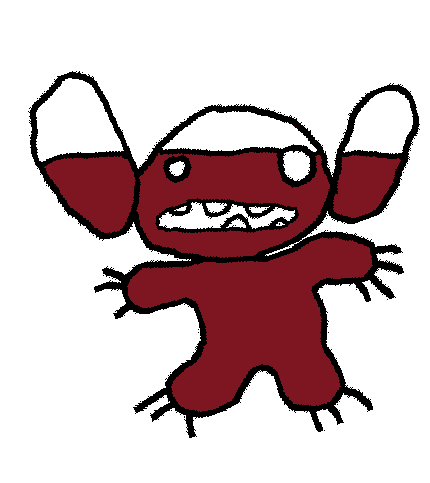

In [83]:
im

What type of object is this?

In [84]:
type(im)

PIL.PngImagePlugin.PngImageFile

Hi Stitch! :D

We can also transform this image into data using NumPy like so:

In [85]:
# lets also import numpy
import numpy as np

In [86]:
im_data = np.array(im)
im_data # I can just put this line right here at the end and it will print out this data "inline" as well

array([[[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]],

       [[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]],

       [[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]],

       ...,

       [[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]],

       [[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]],

       [[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]]], dtype=uint8)

We can then check out some features of this dataset.  For example, what is the shape of this dataset?

In [87]:
im_data.shape

(483, 430, 4)

This is a 483x430 image with 4 color channels: (R=Red, G=Green, B=Blue, A=Alpha), where here "Alpha" means opacity.

One represenation of RGB color combinations can be seen in a typical "color wheel":

<img src="https://i.pinimg.com/originals/b7/45/3a/b7453aedcbd060c8b842d85f27c083fb.jpg" width="400px">

What are the unique numbers in this dataset? (i.e. this dataset's values w/o any repeats)

In [88]:
np.unique(im_data)

array([  0,  22,  33, 126, 255], dtype=uint8)

#### ASIDE:
The above lists the unique numbers in this dataset.  If we wanted to check color by color? 

In [89]:
channel_labels = ['R', 'G', 'B', 'A']
for i in range(im_data.shape[2]): # this loops over the last entry of the shape array, so the #4
    print('channel=', channel_labels[i], 
          'unique values=', np.unique( im_data[:,:,i] ) ) # print the unique elements in each channel

channel= R unique values= [  0 126 255]
channel= G unique values= [  0  22 255]
channel= B unique values= [  0  33 255]
channel= A unique values= [  0 255]


This tells us some interesting things!  Unless there are weird combinations, it looks like we have only 3 colors here.  We also only have 2 opacity channels -- either a pixel is opaque (255) or completely invisible (0).

We can double check the uniqe colors by once again apply `np.unique` but using the "axis" argument to tell it what axis to look down.  This is a bit of Python "magic" so feel free to just take my word for it right now, or you can read more details here: https://stackoverflow.com/questions/24780697/numpy-unique-list-of-colors-in-the-image

#### END ASIDE

To see how many unique RGBA combos, we can make use of the `np.unique` function.  Let's try using it the naive way:

In [90]:
np.unique(im_data)

array([  0,  22,  33, 126, 255], dtype=uint8)

We'll, this isn't quite what we want -- we want a list of the RGBA combs, not all the unique numbers in the array as a whole.  To do this, we have to mess with the shape of the array we give `np.unique`:

In [91]:
im_data.shape

(483, 430, 4)

Let's line up this array instead of as x/y pixels as a list of pixels's RGBA colors:

In [92]:
im_data.reshape(-1, im_data.shape[2])

array([[0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       ...,
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0]], dtype=uint8)

Now we can apply `np.unique` to this reshaped array and specify the specifc axis (the first or 0th axis):

In [93]:
np.unique(im_data.reshape(-1, im_data.shape[2]), axis=0)

array([[  0,   0,   0,   0],
       [  0,   0,   0, 255],
       [126,  22,  33, 255],
       [255, 255, 255, 255]], dtype=uint8)

We can also display this image again, but since we have the data, we can use `matplotlib` to plot -- let's first make a "quick plot" with `matplotlib`:

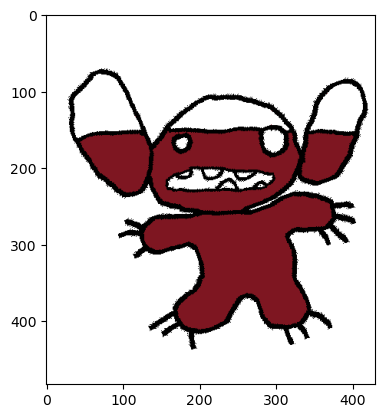

In [94]:
plt.imshow(im_data)

We can tell matplotlib to please just show us the thing without giving us the memory address at the top with:

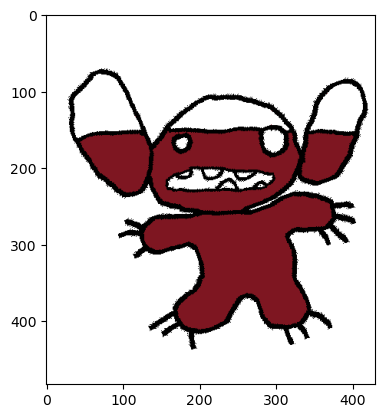

In [95]:
plt.imshow(im_data)
plt.show()

We will end up wanting finer control over how this image looks, which we can do by creating a figure and axis objects.  Before plotting an image, we can see what the "default" of these objects look like with:

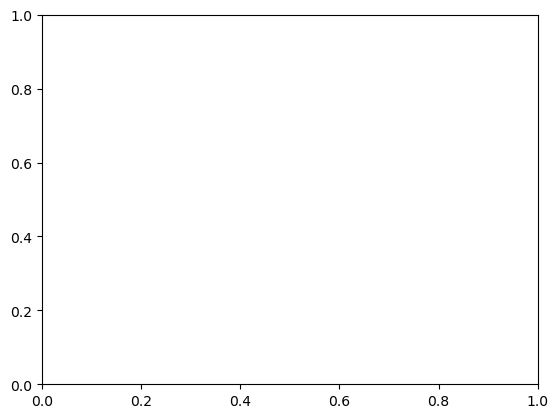

In [96]:
fig, ax = plt.subplots() # generate a "fig" and "ax" object

Here, the "fig" is sort of like the total canvas and the "axis" is everything associated with the box.  `ax` is its own special `matplotlib` object:

In [97]:
ax

<AxesSubplot:>

We can also change the size of these axis with:

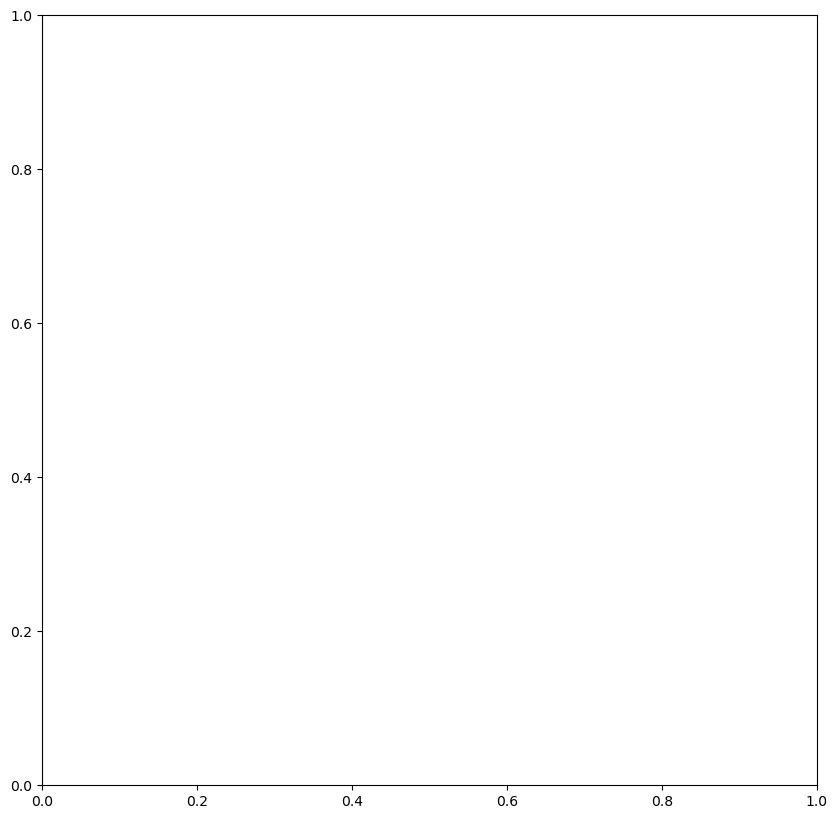

In [98]:
fig, ax = plt.subplots(figsize=(10,10)) # generate a "fig" and "ax" object

Finally, we can add our image to these axis:

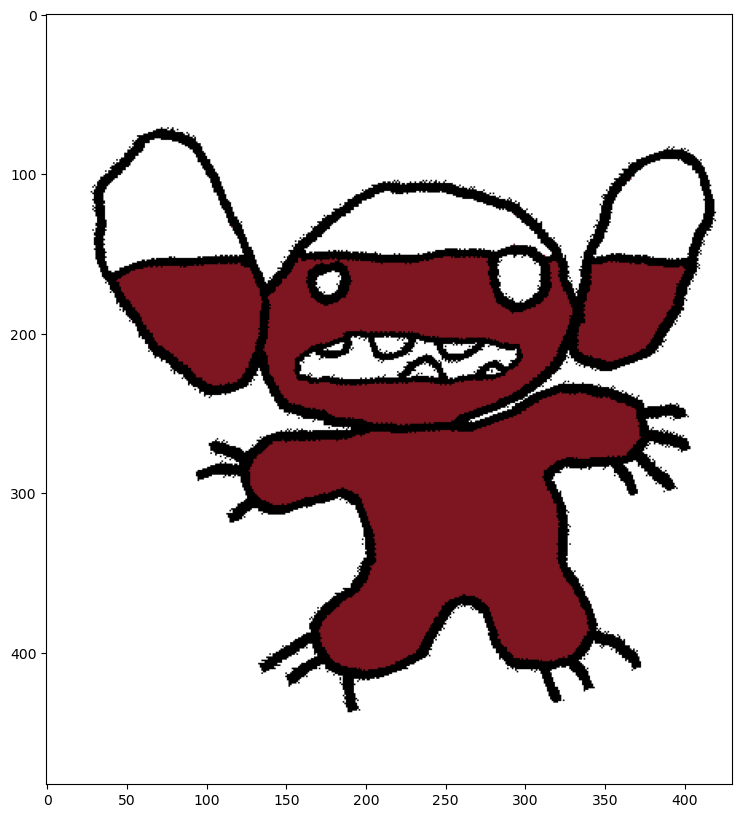

In [99]:
fig, ax = plt.subplots(figsize=(10,10)) # generate a "fig" and "ax" object

ax.imshow(im_data) # use imshow function with "ax" object

plt.show() # this gets rid of the print memory address thing

**NOTE: we might do this section second and 1.B first**

Here, its a bit hard to see that there is white in the interior part of Stitch and then it's transparent outside.  We can modify our plot to show this, by making a gray background.  There are a few ways of doing this, probably the easiest is by setting a gray background:

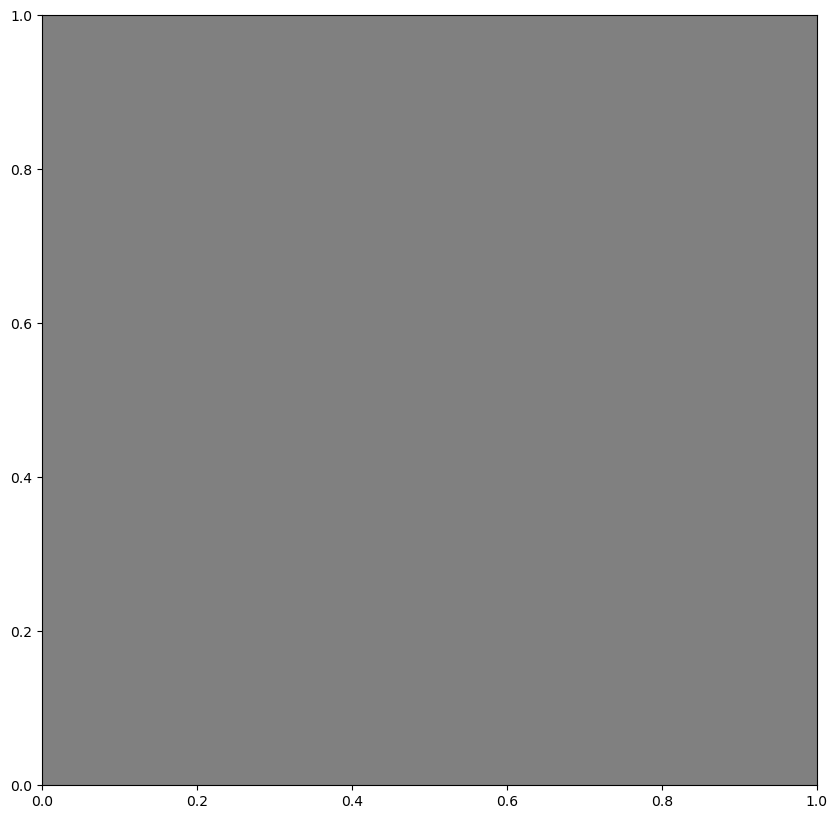

In [100]:
fig, ax = plt.subplots(figsize=(10,10)) # generate a "fig" and "ax" object

ax.set_facecolor('gray') # set background as gray

plt.show()

Now, let's add our stitch image on top:

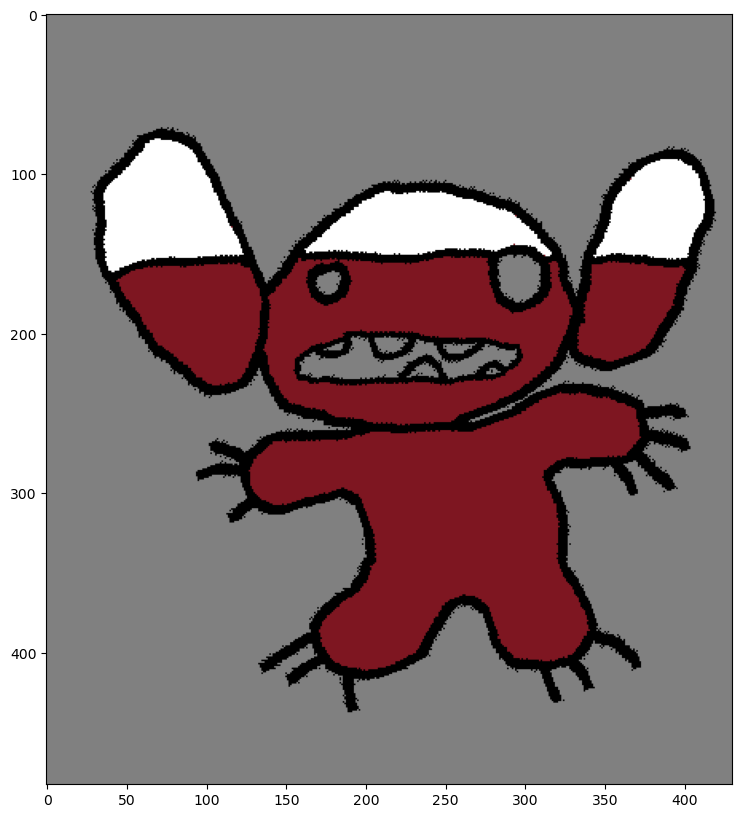

In [101]:
fig, ax = plt.subplots(figsize=(10,10)) # generate a "fig" and "ax" object

ax.set_facecolor('gray')

ax.imshow(im_data) # then we plot our Stitch image over the top

plt.show() # this gets rid of the print memory address thing

If we recall from the lecture, we talked a bit about how to use this visualization to figure out how to quantify the goodness or badness of Stitch.  Let's play with this idea a bit more now.

Let's start by counting up all the pixels that are "good" in Stitch.  If we see our image above, this is denoted by the white parts of the head an ears.  

**NOTE: this is an example of *filtering* our data!**

In color space, white is denoted by (255, 255, 255, 255) so we will create a filtering "mask" for these values by making sure all color channels have the value of 255.

For example, we can make a boolean mask that only looks for when the R channel, the first in the RGBA channels, is at the maximum value = 255

In [102]:
reds_good_mask = im_data[:,:,0] == 255

In [103]:
reds_good_mask

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

Its mostly false because most of the image does NOT have a 255 red channel.  But we can also see which parts of the image are:

In [104]:
im_data[reds_good_mask]

array([[255, 255, 255, 255],
       [255, 255, 255, 255],
       [255, 255, 255, 255],
       ...,
       [255, 255, 255, 255],
       [255, 255, 255, 255],
       [255, 255, 255, 255]], dtype=uint8)

In [105]:
np.unique(im_data[reds_good_mask].reshape(-1, im_data.shape[2]), axis=0)

array([[255, 255, 255, 255]], dtype=uint8)

So, this is, in theory ONLY looking for pixels that have 255 in the red channel, and we are lucky in this case that this is only associated with one color -- the color white.  But, to be sure, we really want to make a check for ALL of the RGBA channels and make a combined mask for all of them.  With boolean masks this looks like:

In [106]:
reds_good_mask = im_data[:,:,0] == 255
greens_good_mask = im_data[:,:,1] == 255
blues_good_mask = im_data[:,:,2] == 255
alphas_good_mask = im_data[:,:,3] == 255

# pixel_mask_good is the combined boolean mask that will check for ALL conditions
pixel_mask_good = reds_good_mask & greens_good_mask & blues_good_mask & alphas_good_mask

Now, using this mask, let's count up the number of "good" pixels.  

We do this by first selecting out only the good pixels:

In [107]:
good_pixels = im_data[pixel_mask_good]

And then we find out the length of this array which is simply the total number of "good" pixels:

In [108]:
ngood = len(good_pixels)
ngood

11929

We can even plot this part of our dataset by creating a masked Stitch image that will just take this "good" part out:

In [109]:
im_data_masked_good = im_data.copy() # first we make a copy of our original dataset to modify
im_data_masked_good[~pixel_mask_good] = 0 # then we set everything that is *NOT* a good pixel to 0 so it will show up gray
# Note here the "~" is the opposite mask of our good pixel mask

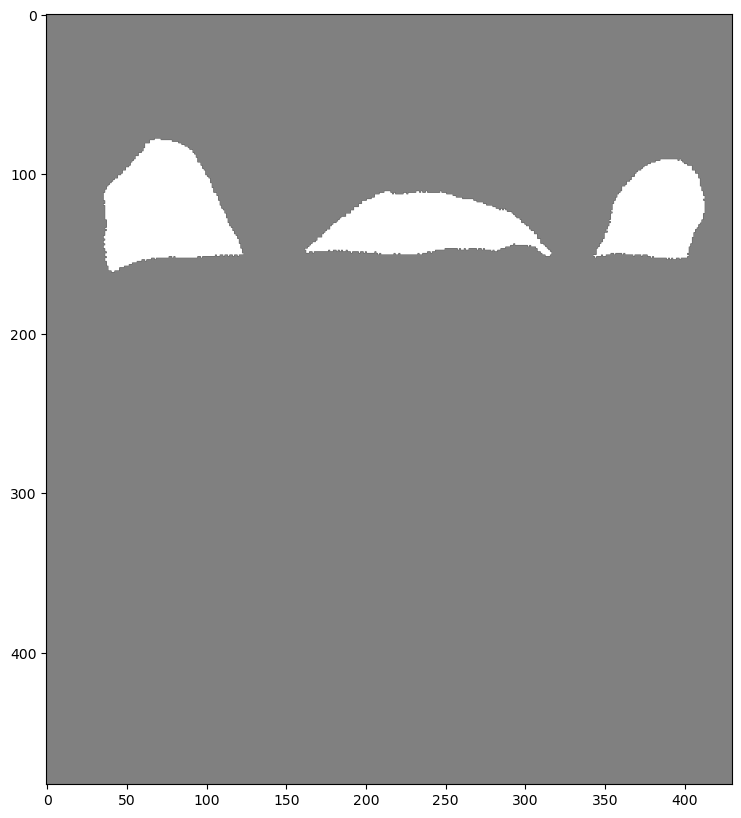

In [110]:
fig, ax = plt.subplots(figsize=(10,10)) # generate a "fig" and "ax" object

ax.set_facecolor('gray')

ax.imshow(im_data_masked_good) # then we plot our Stitch image over the top

plt.show() # this gets rid of the print memory address thing

We can do the same thing for the "bad" pixels.  This is the color RGBA combo of: (126, 22, 33, 255)

In [111]:
pixel_mask_bad = (im_data[:,:,0] == 126) & \
                  (im_data[:,:,1] == 22) & \
                  (im_data[:,:,2] == 33) & \
                  (im_data[:,:,3] == 255)
# Note the "\" is a line continuation character --> make sure you don't have anything, even a space after it!

In [112]:
nbad = len(im_data[pixel_mask_bad])
nbad

40949

And also plot:

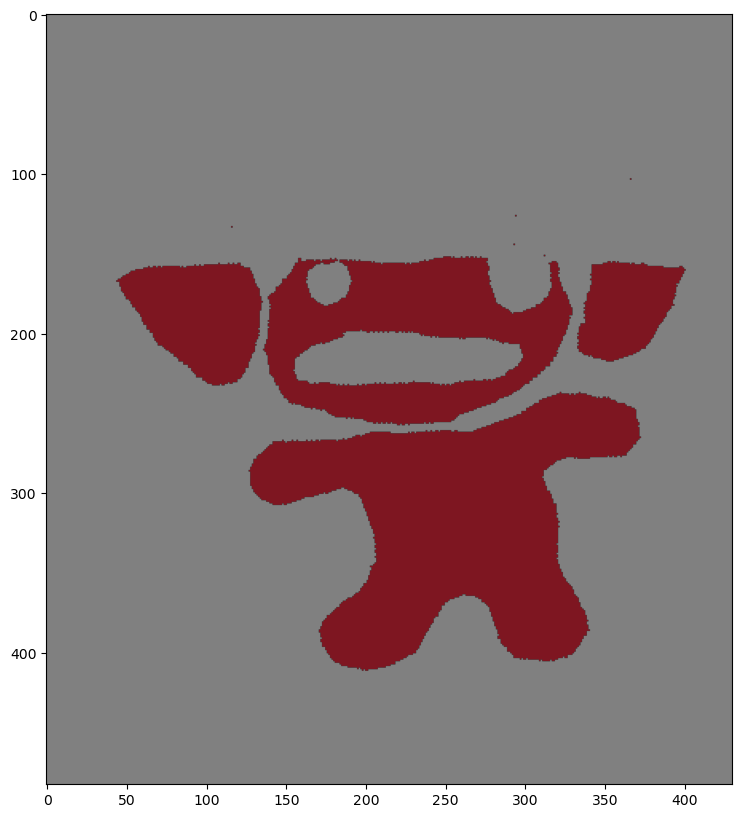

In [113]:
im_data_masked_bad = im_data.copy() # first we make a copy of our original dataset to modify
im_data_masked_bad[~pixel_mask_bad] = 0 # then we set everything that is *NOT* a good pixel to 0 so it will show up gray
# Note here the "~" is the opposite mask of our good pixel mask

fig, ax = plt.subplots(figsize=(10,10)) # generate a "fig" and "ax" object

ax.set_facecolor('gray')

ax.imshow(im_data_masked_bad) # then we plot our Stitch image over the top

plt.show() # this gets rid of the print memory address thing

We can then calculate the goodness/badness ratio as their respective numbers divided by the total number of interior pixels: 

$\rm{goodness \, \%} = \frac{ngood}{ngood+nbad}$

$\rm{badness \, \%} = \frac{nbad}{ngood+nbad}$

In [114]:
total = ngood + nbad
badness = nbad / total
goodness = ngood/  total
print(badness, goodness)

0.774405234691176 0.22559476530882408


So, it looks like about 77% bad and 23% good, by volume.  Does that match up with what you'd think from looking at the above figure?

We can now plot the goodness and badness levels with a little bar plot that may show these levels a bit more accurately.  We'll also add a little legend to show what is "goodness" and "badness" colors.

Note, there is a nice diagram of the named colors in Python below:

<img src="https://matplotlib.org/3.1.0/_images/sphx_glr_named_colors_003.png" width="600px">

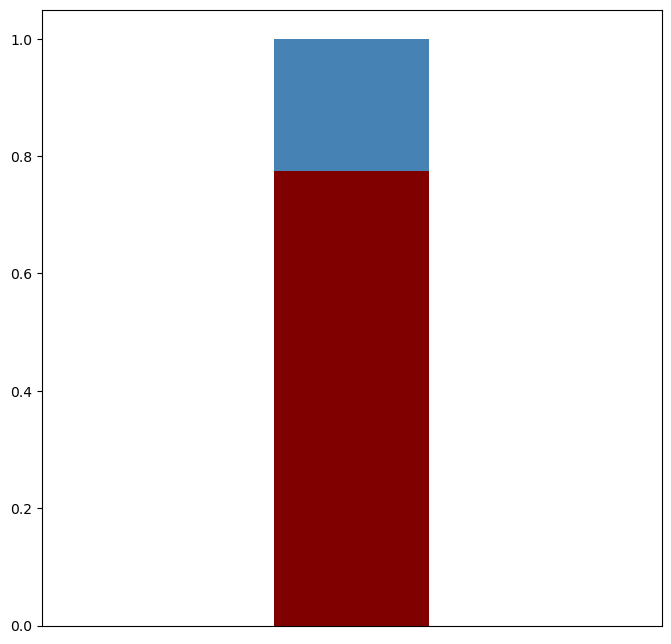

In [115]:
fig, ax = plt.subplots(figsize=(8,8))

ax.bar([1], badness, [0.5], color='maroon', label="badness") # this just plots a bar centered at 1 with a width of 0.5

ax.bar([1], goodness, [0.5], color="steelblue", 
       bottom=badness, label="goodness") # this plots a bar *on top* of the badness bar

ax.set_xlim(0.0, 2.0) # to center around our bar

# since our x-axis are meaningless, we want to "hide" them (see week01's notebook):
ax.xaxis.set_visible(False)

plt.show()

What if we just counted pixes from our figure above? Looks like good changes to badness at ~150, image top is at ~75 pixels image bottom is at ~425 pixels:

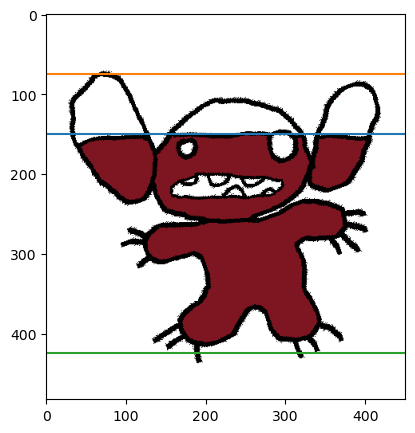

In [116]:
# Let's remind ourselves a bit of what this image looks like
fig,ax = plt.subplots(figsize=(5,5))
ax.imshow(im)

ax.plot([0,450], [150, 150]) # approximate badness line
ax.plot([0,450], [75, 75]) # approximate top line
ax.plot([0,450], [425, 425]) # approximate bottom line

ax.set_xlim(0,450)

plt.show()

In [117]:
# so:
goodness_apparent = (75-150)/(75-425)

In [118]:
# what is badness, apparent
1.0-goodness_apparent

0.7857142857142857

## 2.B RGB decomposition of images (+ talking about HW2 ~30 minutes )

Now that we've made some image-plots of Stitch and quantified his goodness/badness levels, let's also quantify an aspect of the image that we will talk more about next week -- its color representation.

We already saw that its got a very few colors, and looked at the ones associated with "goodness" and "badness", but let's delve a little deeper and see how we can plot ALL the colors in an image using histograms.

For example, let's plot the histogram of the red channel:

In [119]:
# recall:
im_data.shape

(483, 430, 4)

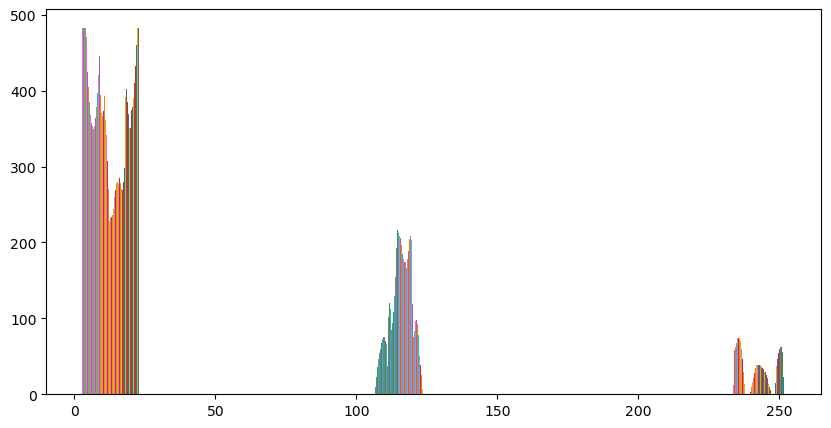

In [120]:
fig, ax = plt.subplots(figsize=(10,5))

ax.hist(im_data[:,:,0]) # 0 = red

plt.show()

So, this looks a little weird, but why?  We'll if we look at the shape of the data input to hist:

In [121]:
im_data[:,:,0].shape

(483, 430)

We see that it is 2D, and by default, `.hist` assumes that 2D data represents a *vector* of values you want to take a histogram of.  In our case, we want each pixel to be counted equally and not part of a row, so we can "unwrap" our data:

In [122]:
im_data[:,:,0].flatten()

array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)

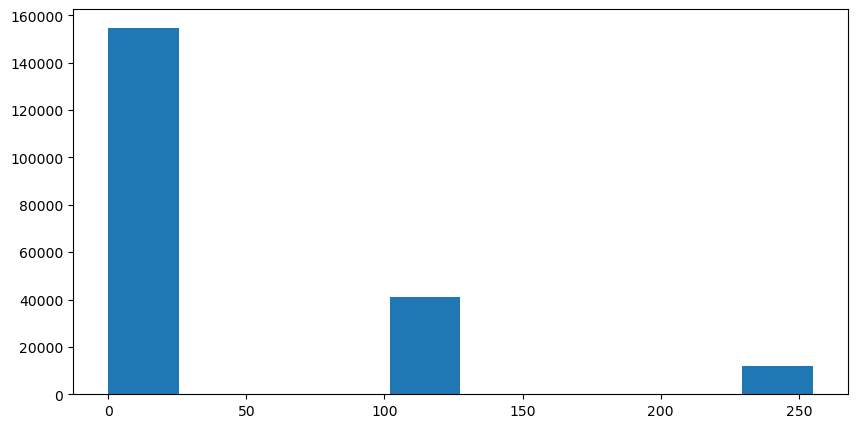

In [123]:
fig, ax = plt.subplots(figsize=(10,5))

ax.hist(im_data[:,:,0].flatten()) # 0 = red

plt.show()

Also, we note that there is some default binning:

In [124]:
ax.hist?

Signature:
ax.hist(
    x,
    bins=None,
    range=None,
    density=False,
    weights=None,
    cumulative=False,
    bottom=None,
    histtype='bar',
    align='mid',
    orientation='vertical',
    rwidth=None,
    log=False,
    color=None,
    label=None,
    stacked=False,
    *,
    data=None,
    **kwargs,
)
Docstring:
Plot a histogram.

Compute and draw the histogram of *x*.  The return value is a tuple
(*n*, *bins*, *patches*) or ([*n0*, *n1*, ...], *bins*, [*patches0*,
*patches1*, ...]) if the input contains multiple data.  See the
documentation of the *weights* parameter to draw a histogram of
already-binned data.

Multiple data can be provided via *x* as a list of datasets
of potentially different length ([*x0*, *x1*, ...]), or as
a 2D ndarray in which each column is a dataset.  Note that
the ndarray form is transposed relative to the list form.

Masked arrays are not supported.

The *bins*, *range*, *weights*, and *density* parameters behave as in
`numpy.histogram`.

Pa

Since we know that the red channel can go from 0 to 255, this means we have 256 bins -- let's use this explicitly:

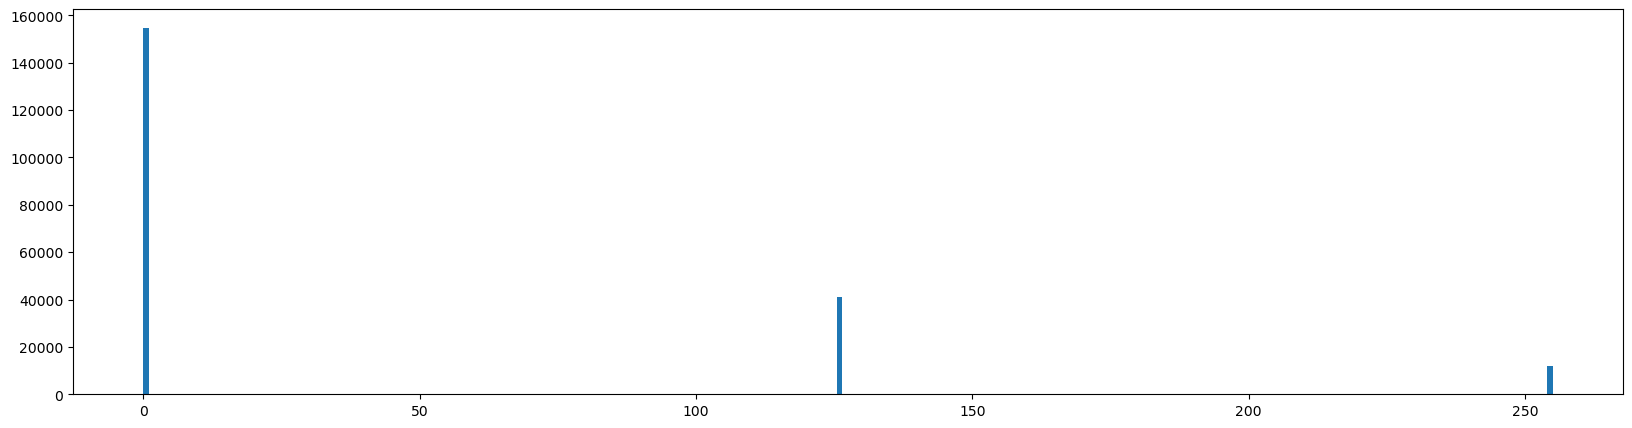

In [125]:
fig, ax = plt.subplots(figsize=(20,5))

ax.hist(im_data[:,:,0].flatten(),bins=256) # 0 = red

plt.show()

Also, its generally good practice to label our plots, which we can do with `ax.set_` calls:

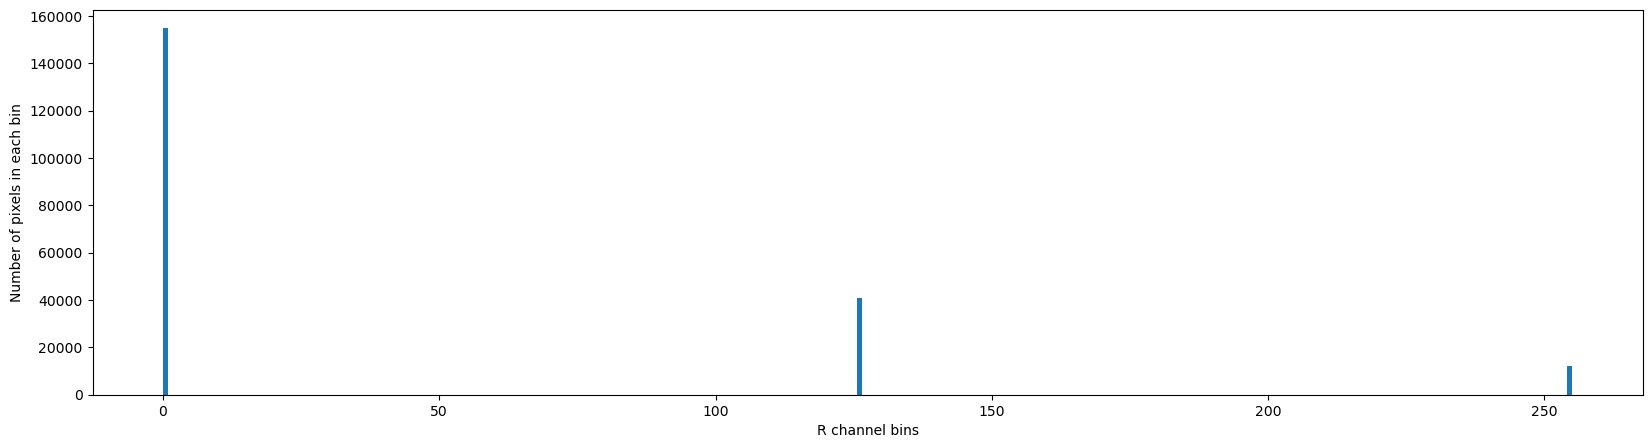

In [126]:
fig, ax = plt.subplots(figsize=(20,5))

ax.hist(im_data[:,:,0].flatten(),bins=256) # 0 = red

# try ax.set_x and then hit TAB to see a list of options
ax.set_xlabel('R channel bins')

ax.set_ylabel('Number of pixels in each bin')

plt.show()

Generally, we'll want to compare all color channels to each other, so let's include the green channel in our plot:

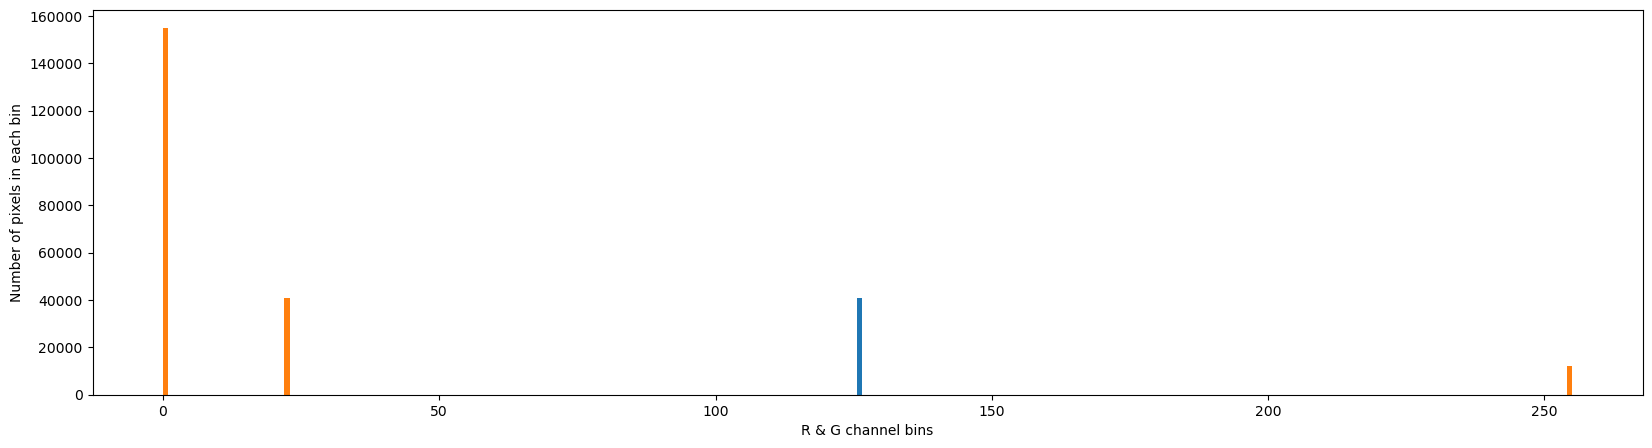

In [127]:
fig, ax = plt.subplots(figsize=(20,5))

ax.hist(im_data[:,:,0].flatten(),bins=256) # 0 = red
ax.hist(im_data[:,:,1].flatten(),bins=256) # 1 = green

ax.set_xlabel('R & G channel bins') # change here too

ax.set_ylabel('Number of pixels in each bin')

plt.show()

So here, we have a few issues, one is that the colors are wrong AND the bins are overlapping.  One crisis at a time -- let's make sure the colors are correct:

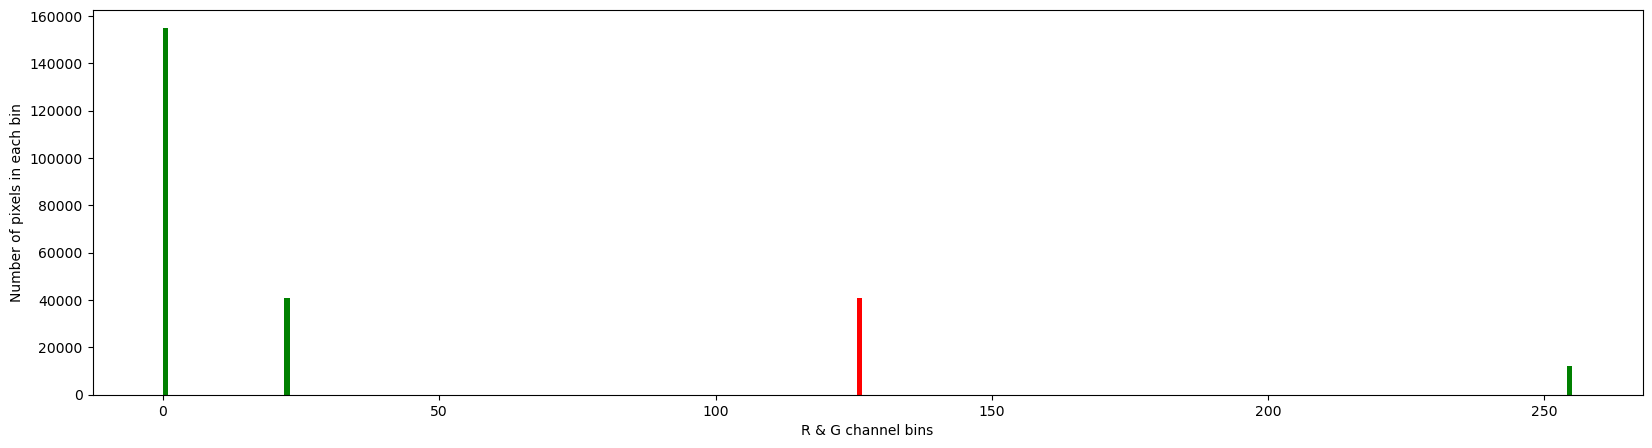

In [128]:
fig, ax = plt.subplots(figsize=(20,5))

ax.hist(im_data[:,:,0].flatten(),bins=256,color='red') # 0 = red
ax.hist(im_data[:,:,1].flatten(),bins=256,color='green') # 1 = green

ax.set_xlabel('R & G channel bins') # change here too

ax.set_ylabel('Number of pixels in each bin')

plt.show()

Now we are getting there, let's try adding in blue for completeness:

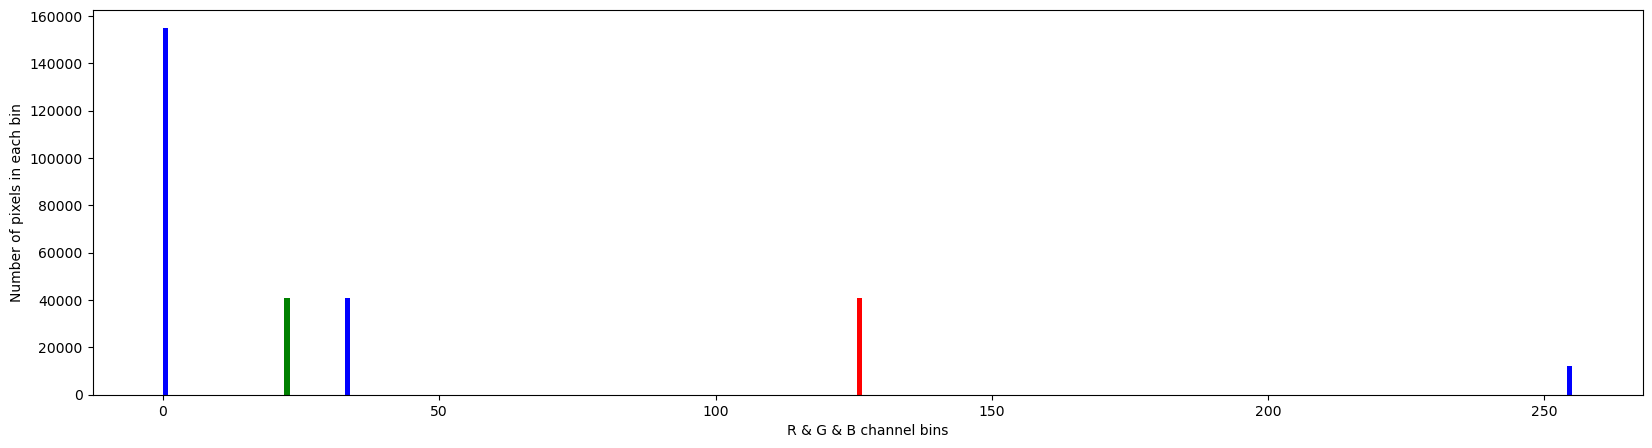

In [129]:
fig, ax = plt.subplots(figsize=(20,5))

ax.hist(im_data[:,:,0].flatten(),bins=256,color='red') # 0 = red
ax.hist(im_data[:,:,1].flatten(),bins=256,color='green') # 1 = green
ax.hist(im_data[:,:,2].flatten(),bins=256,color='blue') # 1 = blue

ax.set_xlabel('R & G & B channel bins') # change here too

ax.set_ylabel('Number of pixels in each bin')

plt.show()

So, this is better, but its hard to see what parts of the figure are different colors.  We can try changing opacity:

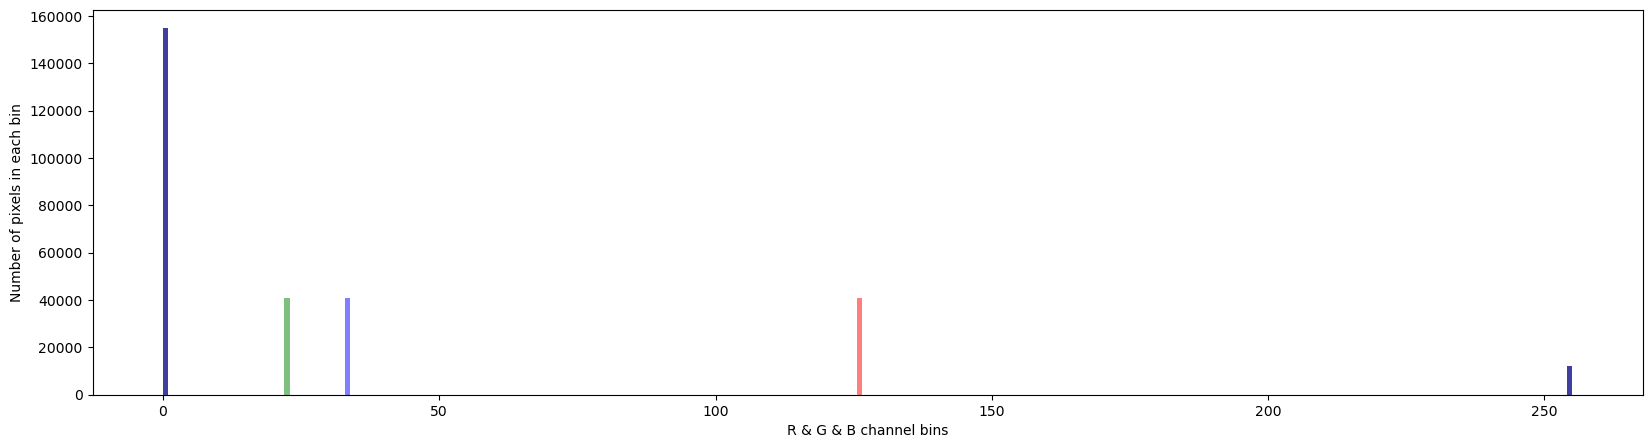

In [130]:
fig, ax = plt.subplots(figsize=(20,5))

ax.hist(im_data[:,:,0].flatten(),bins=256,color='red', alpha=0.5) # 0 = red
ax.hist(im_data[:,:,1].flatten(),bins=256,color='green', alpha=0.5) # 1 = green
ax.hist(im_data[:,:,2].flatten(),bins=256,color='blue', alpha=0.5) # 1 = blue

ax.set_xlabel('R & G & B channel bins') # change here too

ax.set_ylabel('Number of pixels in each bin')

plt.show()

But that is not quite right either.  One option, is to plot these color channels separately in separate axes:

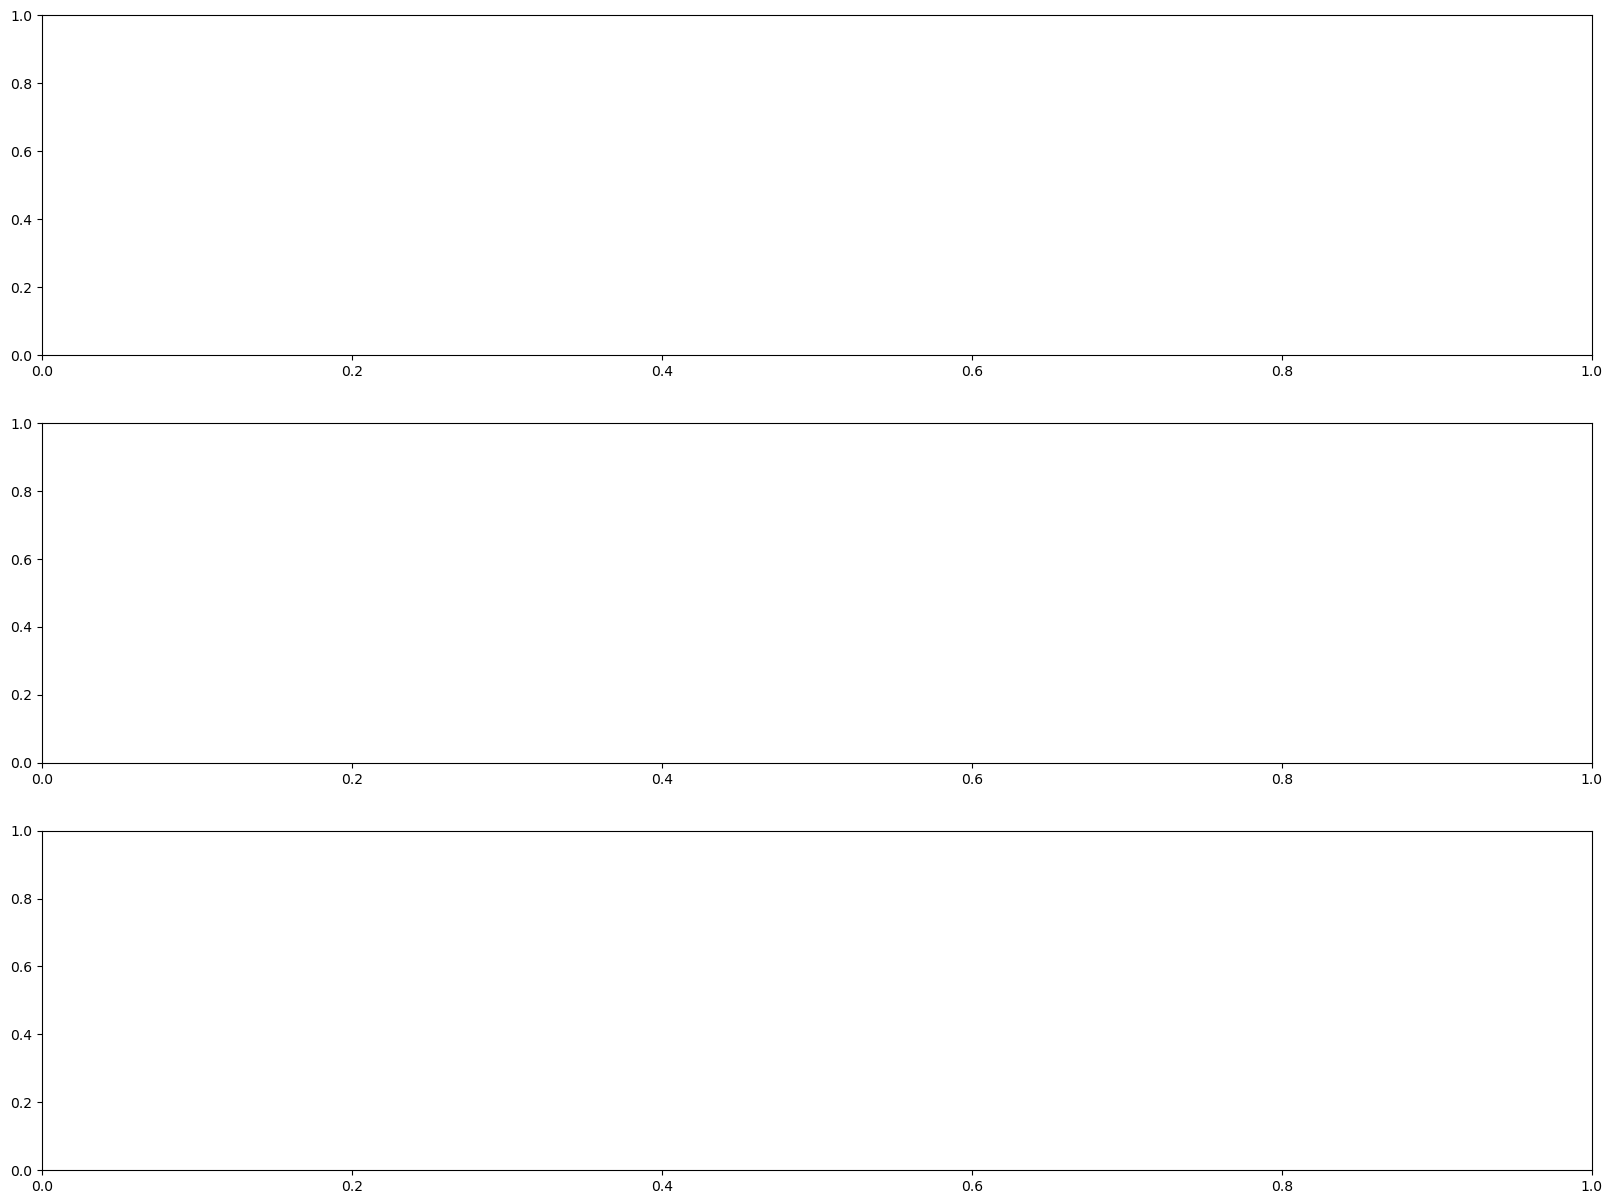

In [131]:
fig, ax = plt.subplots(3,1,figsize=(20,15)) # now we add: #rows, #columns

Now `ax` is actually a vector of axis:

In [132]:
ax

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>], dtype=object)

And we can call each individually like any Python list:

In [133]:
ax[0]

<AxesSubplot:>

Let's use this to modify our code to plot each color channel as its own histogram plot:

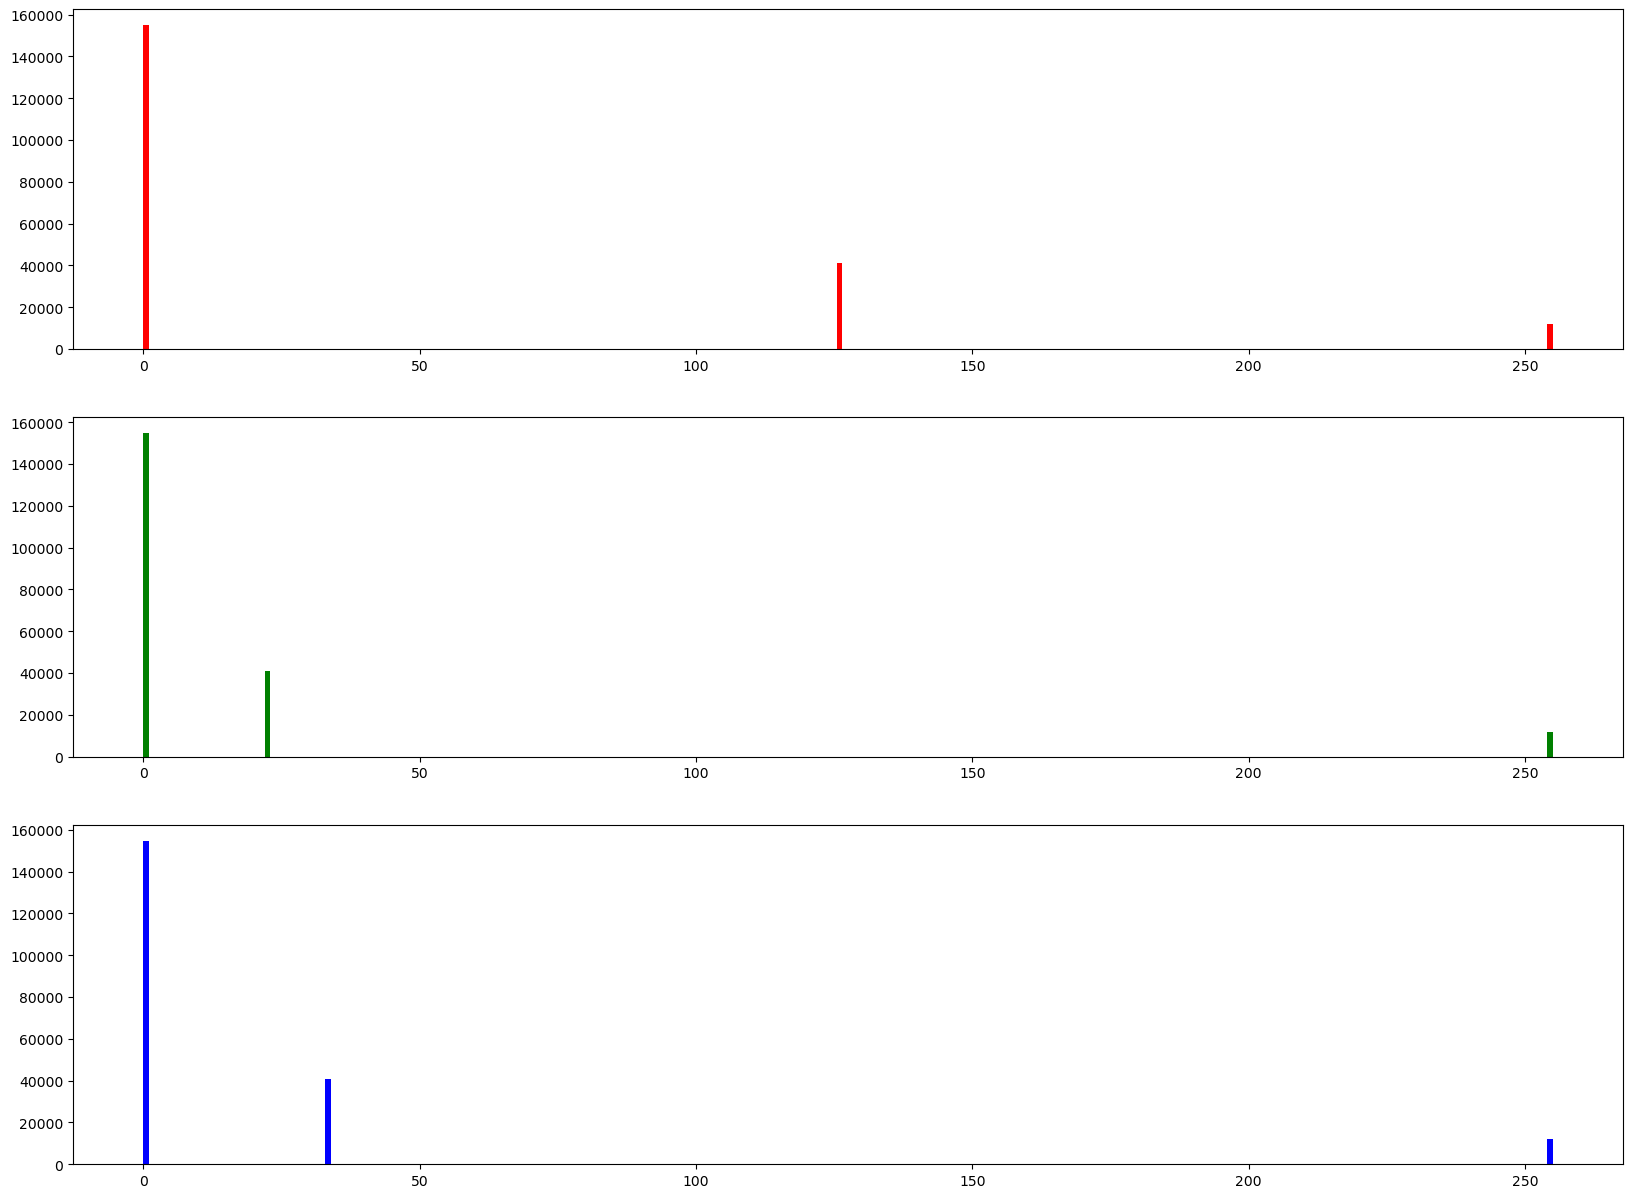

In [134]:
fig, ax = plt.subplots(3,1,figsize=(20,15)) # now we add: #rows, #columns

ax[0].hist(im_data[:,:,0].flatten(),bins=256,color='red') # 0 = red
ax[1].hist(im_data[:,:,1].flatten(),bins=256,color='green') # 1 = green
ax[2].hist(im_data[:,:,2].flatten(),bins=256,color='blue') # 1 = blue

# these will give you errors:
#ax.set_xlabel('R & G & B channel bins') # change here too
#ax.set_ylabel('Number of pixels in each bin')

plt.show()

Now we have to add axis labels for each:

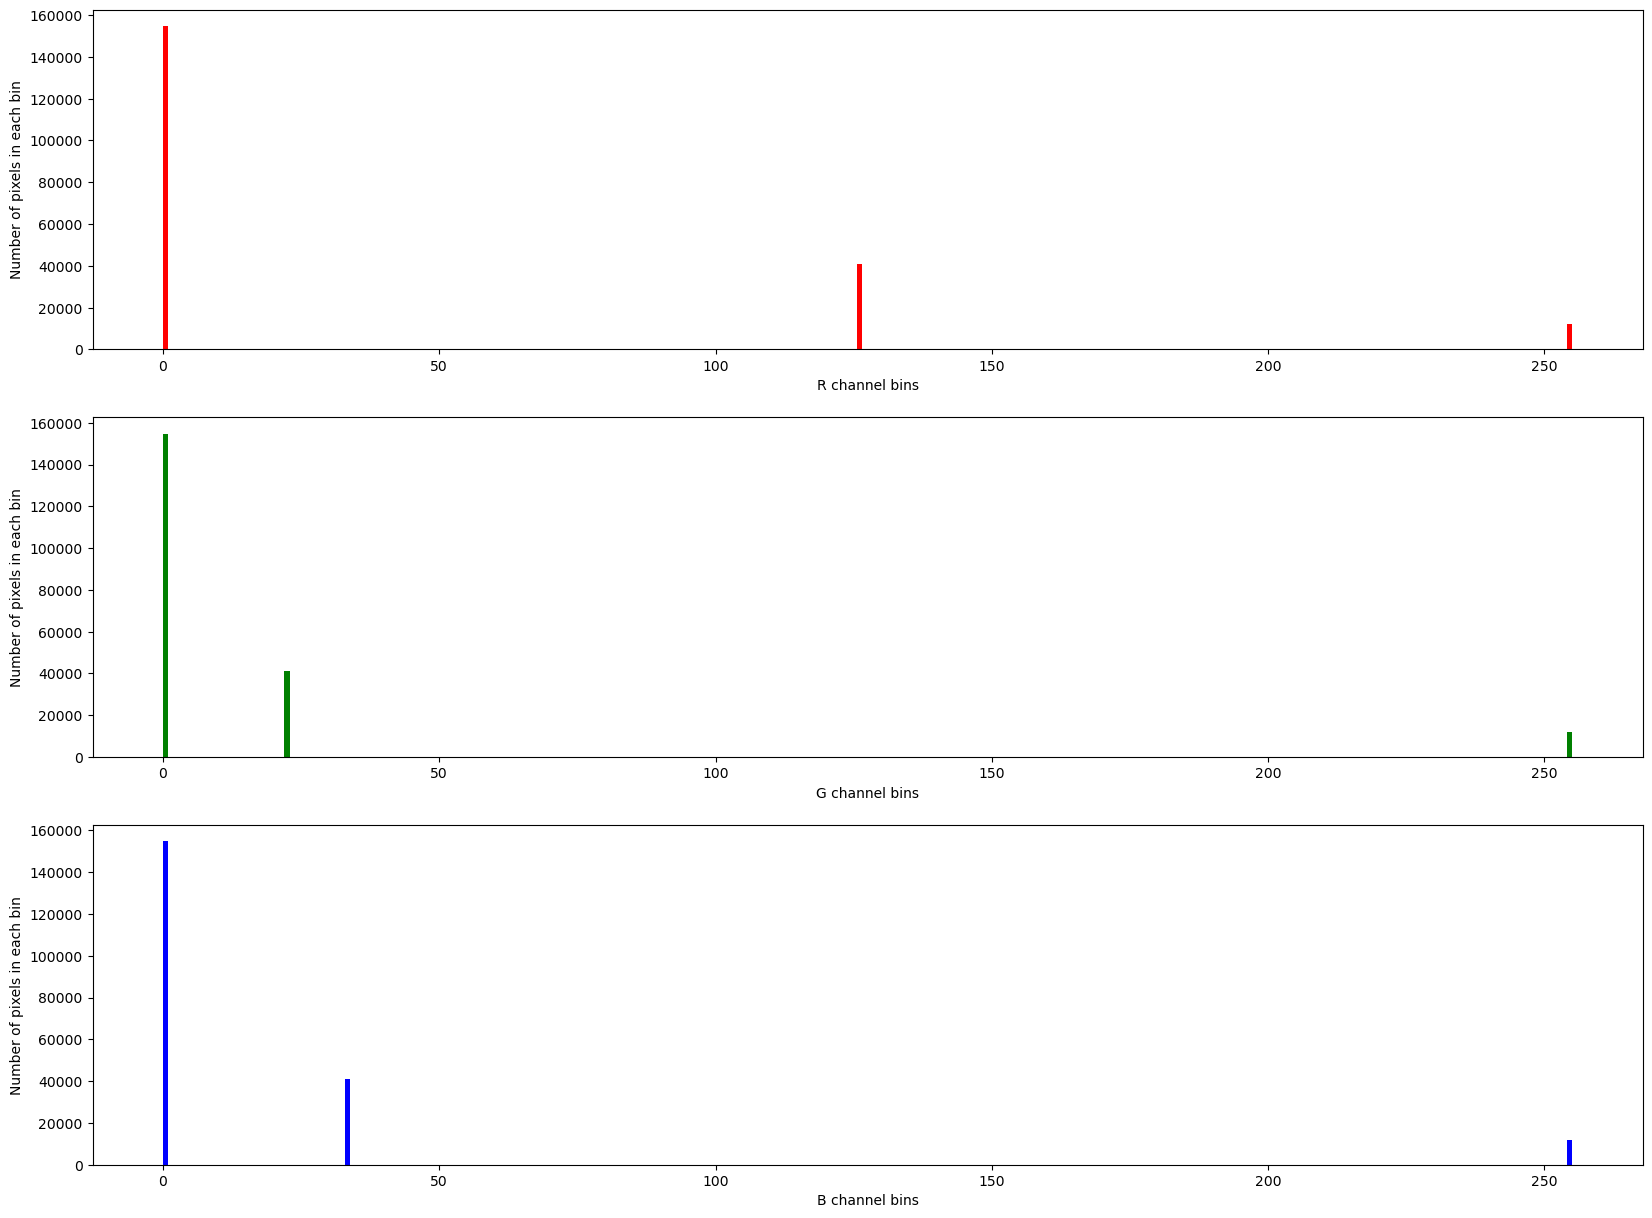

In [135]:
fig, ax = plt.subplots(3,1,figsize=(20,15)) # now we add: #rows, #columns

ax[0].hist(im_data[:,:,0].flatten(),bins=256,color='red') # 0 = red
ax[1].hist(im_data[:,:,1].flatten(),bins=256,color='green') # 1 = green
ax[2].hist(im_data[:,:,2].flatten(),bins=256,color='blue') # 1 = blue

ax[0].set_xlabel('R channel bins') # change here too
ax[1].set_xlabel('G channel bins') # change here too
ax[2].set_xlabel('B channel bins') # change here too

# note: we can also do this in a for loop:
ax[0].set_ylabel('Number of pixels in each bin')
ax[1].set_ylabel('Number of pixels in each bin')
ax[2].set_ylabel('Number of pixels in each bin')

plt.show()

**ASIDE: in a for loop**

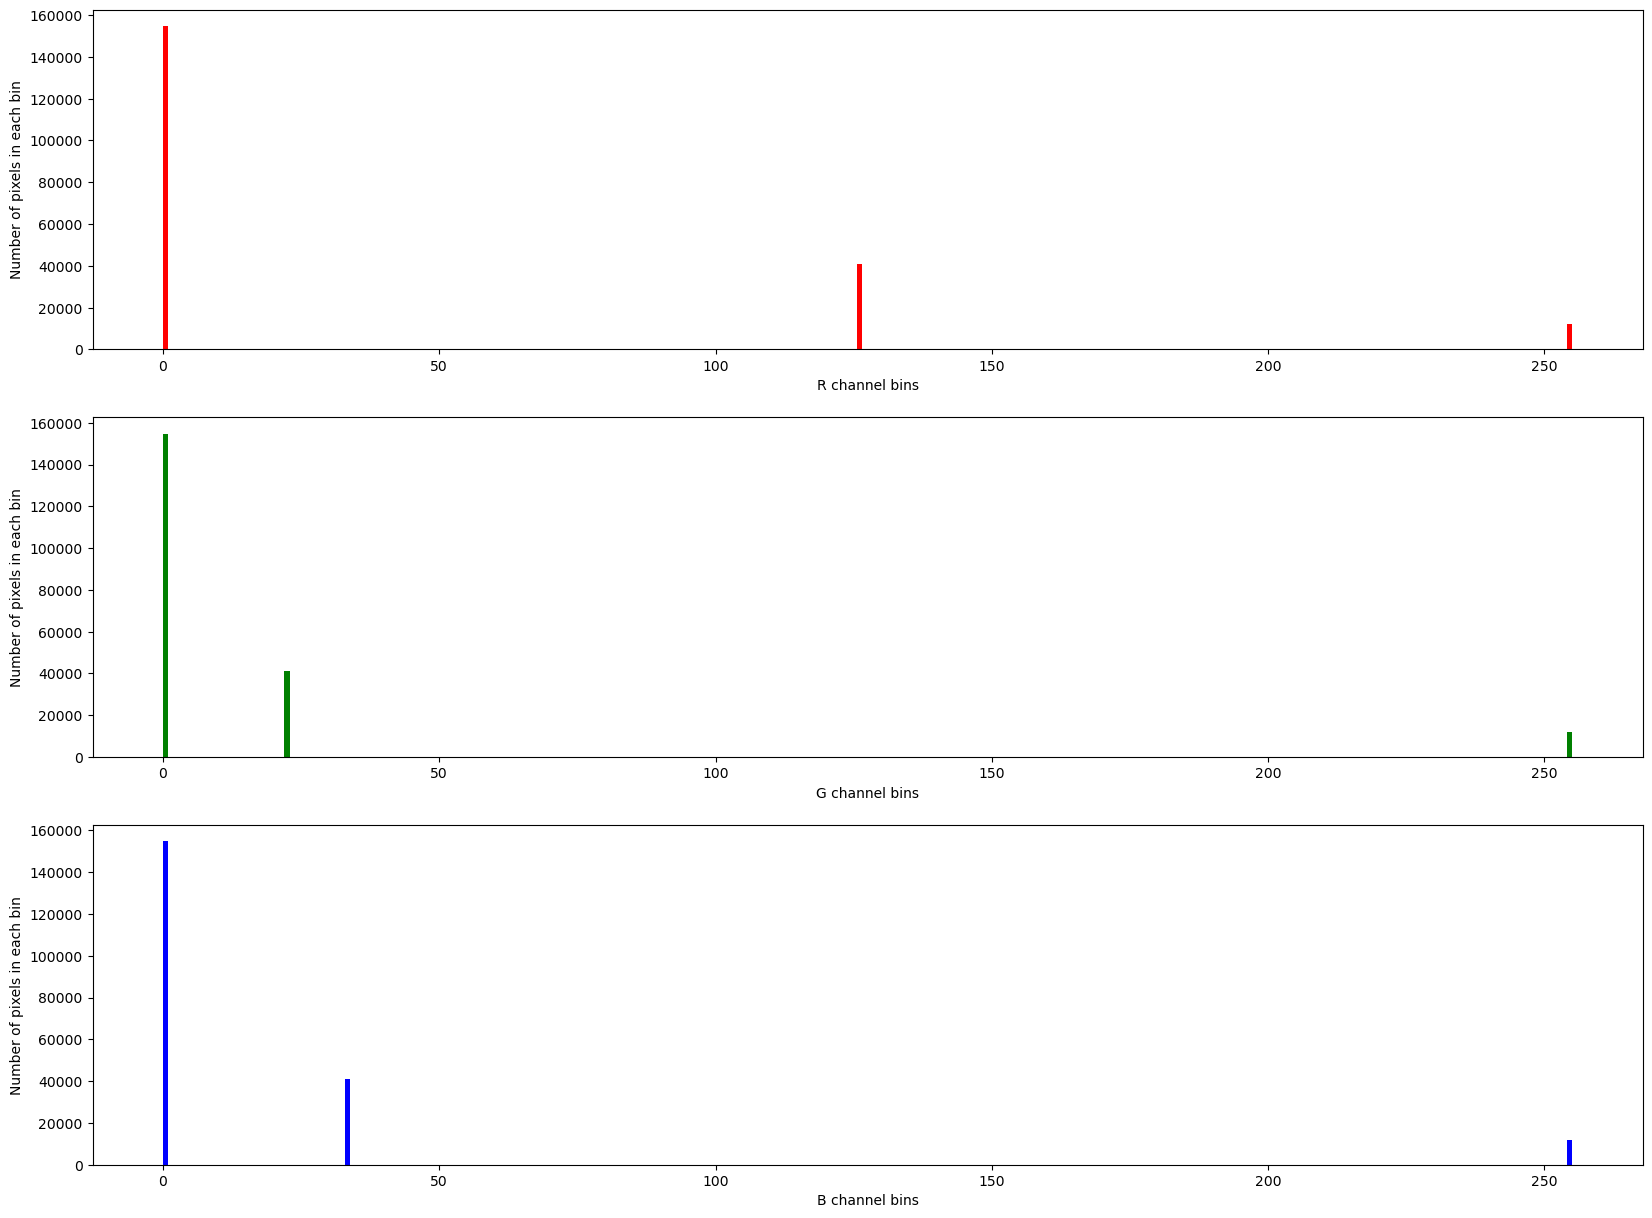

In [136]:
fig, ax = plt.subplots(3,1,figsize=(20,15)) # now we add: #rows, #columns

ax[0].hist(im_data[:,:,0].flatten(),bins=256,color='red') # 0 = red
ax[1].hist(im_data[:,:,1].flatten(),bins=256,color='green') # 1 = green
ax[2].hist(im_data[:,:,2].flatten(),bins=256,color='blue') # 1 = blue

ax[0].set_xlabel('R channel bins') # change here too
ax[1].set_xlabel('G channel bins') # change here too
ax[2].set_xlabel('B channel bins') # change here too

# note: we can also do this in a for loop:
for k in range(3): ax[k].set_ylabel('Number of pixels in each bin')

plt.show()

**END ASIDE**

Finally, because our image has an alpha channel (note: not all images do!!) we also probably want to plot this as well:

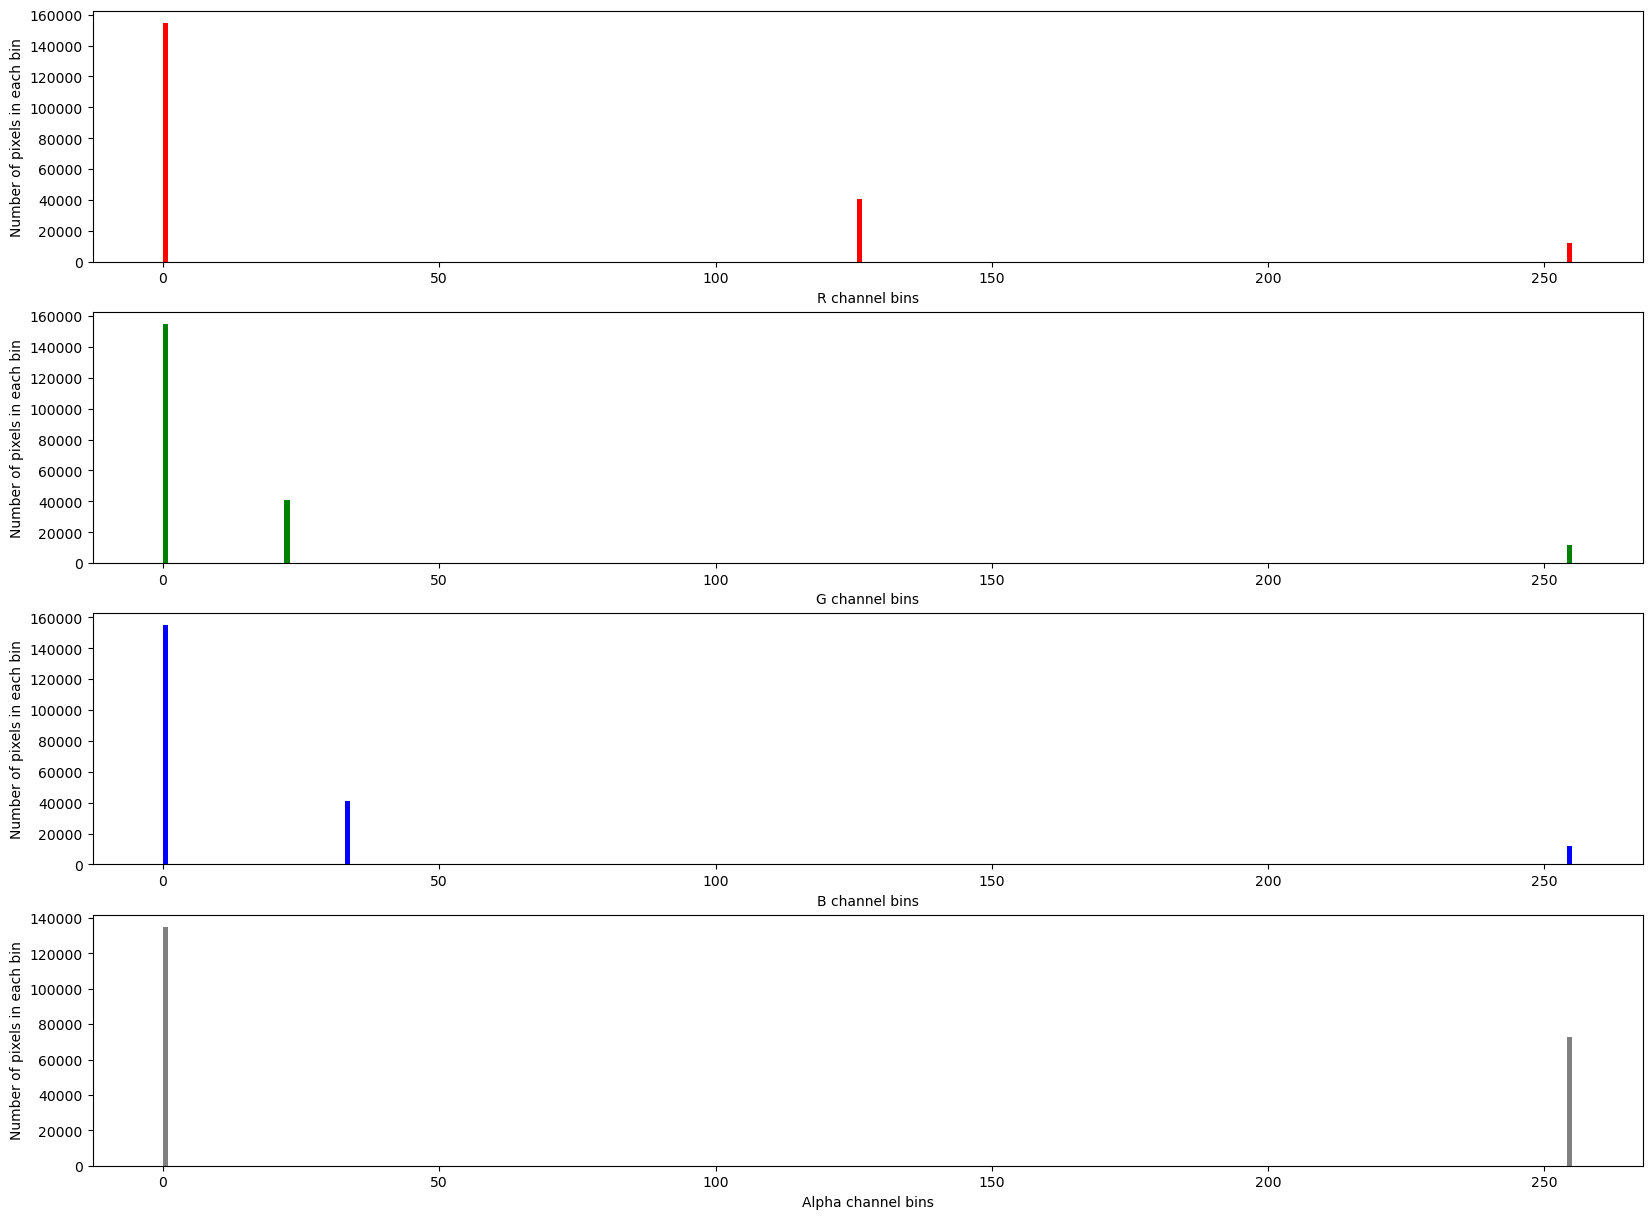

In [137]:
fig, ax = plt.subplots(4,1,figsize=(20,15)) # now we add: #rows, #columns

ax[0].hist(im_data[:,:,0].flatten(),bins=256,color='red') # 0 = red
ax[1].hist(im_data[:,:,1].flatten(),bins=256,color='green') # 1 = green
ax[2].hist(im_data[:,:,2].flatten(),bins=256,color='blue') # 2 = blue
ax[3].hist(im_data[:,:,3].flatten(),bins=256,color='gray') # 3 = alpha

ax[0].set_xlabel('R channel bins') 
ax[1].set_xlabel('G channel bins') 
ax[2].set_xlabel('B channel bins')
ax[3].set_xlabel('Alpha channel bins') 

ax[0].set_ylabel('Number of pixels in each bin')
ax[1].set_ylabel('Number of pixels in each bin')
ax[2].set_ylabel('Number of pixels in each bin')
ax[3].set_ylabel('Number of pixels in each bin')

plt.show()

So, what does this tell us?  It tells us that a lot of pixels are 0,0,0 -- so we should see a lot of black, *but* because there is a lot of pixels with an alpha-channel of 0 (i.e. perfectly transparent) we don't see a lot of black.

Note: this way of plotting things doesn't show us the *combinations* of RGB(A) values, only their relative distributions.  See the spring2021 notebook for a different way of visualizing this.

Finally, we probably want to plot our image for comparision with this.  One way is just to add another plot to our list:

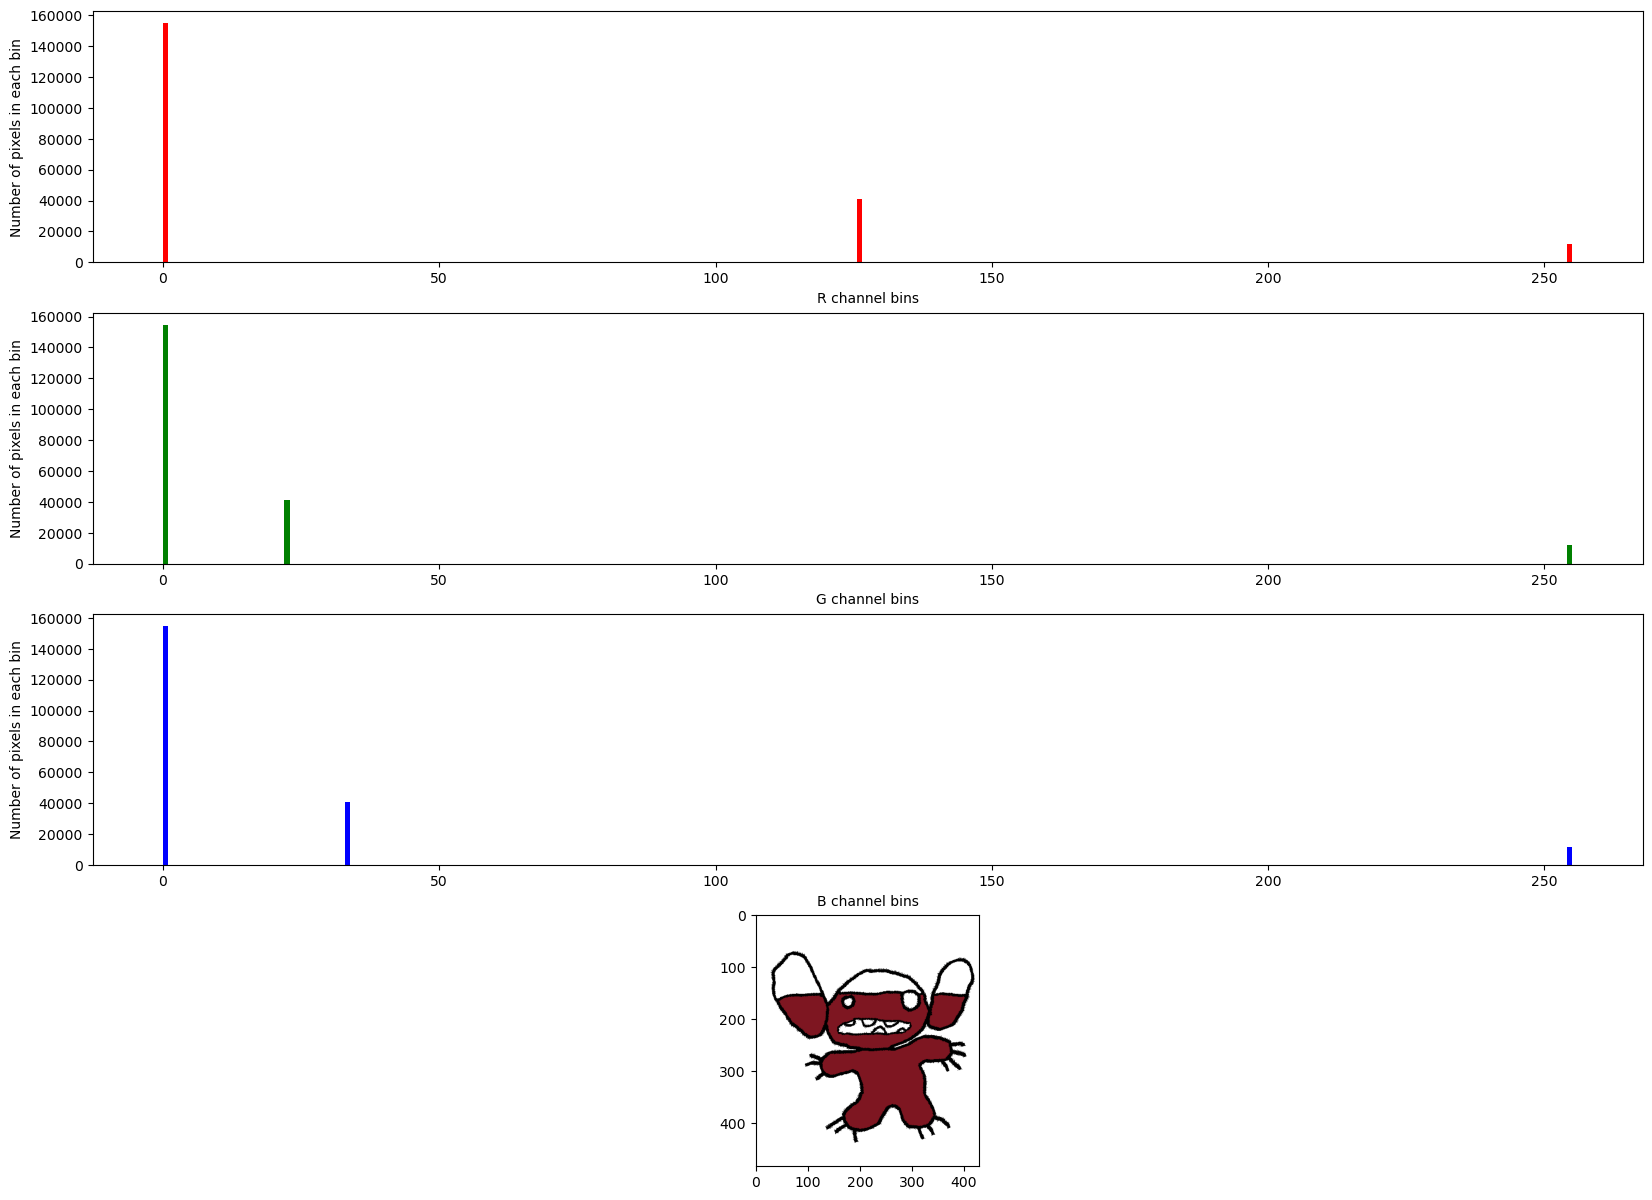

In [138]:
fig, ax = plt.subplots(4,1,figsize=(20,15)) # now we add: #rows, #columns

ax[0].hist(im_data[:,:,0].flatten(),bins=256,color='red') # 0 = red
ax[1].hist(im_data[:,:,1].flatten(),bins=256,color='green') # 1 = green
ax[2].hist(im_data[:,:,2].flatten(),bins=256,color='blue') # 2 = blue

# here, I'm going to ignore alpha in favor of plotting the image:
ax[3].imshow(im_data)

ax[0].set_xlabel('R channel bins') 
ax[1].set_xlabel('G channel bins') 
ax[2].set_xlabel('B channel bins')

ax[0].set_ylabel('Number of pixels in each bin')
ax[1].set_ylabel('Number of pixels in each bin')
ax[2].set_ylabel('Number of pixels in each bin')

plt.show()

Note: this is perfectly fine for the homework!  However, if you want to get a little fancy, you can check out some other layout options, like gridspec (or mosaic for later matplotlib version): https://matplotlib.org/stable/tutorials/intermediate/gridspec.html

Using this instead of subplots, we could layout our figures to look the same like so:

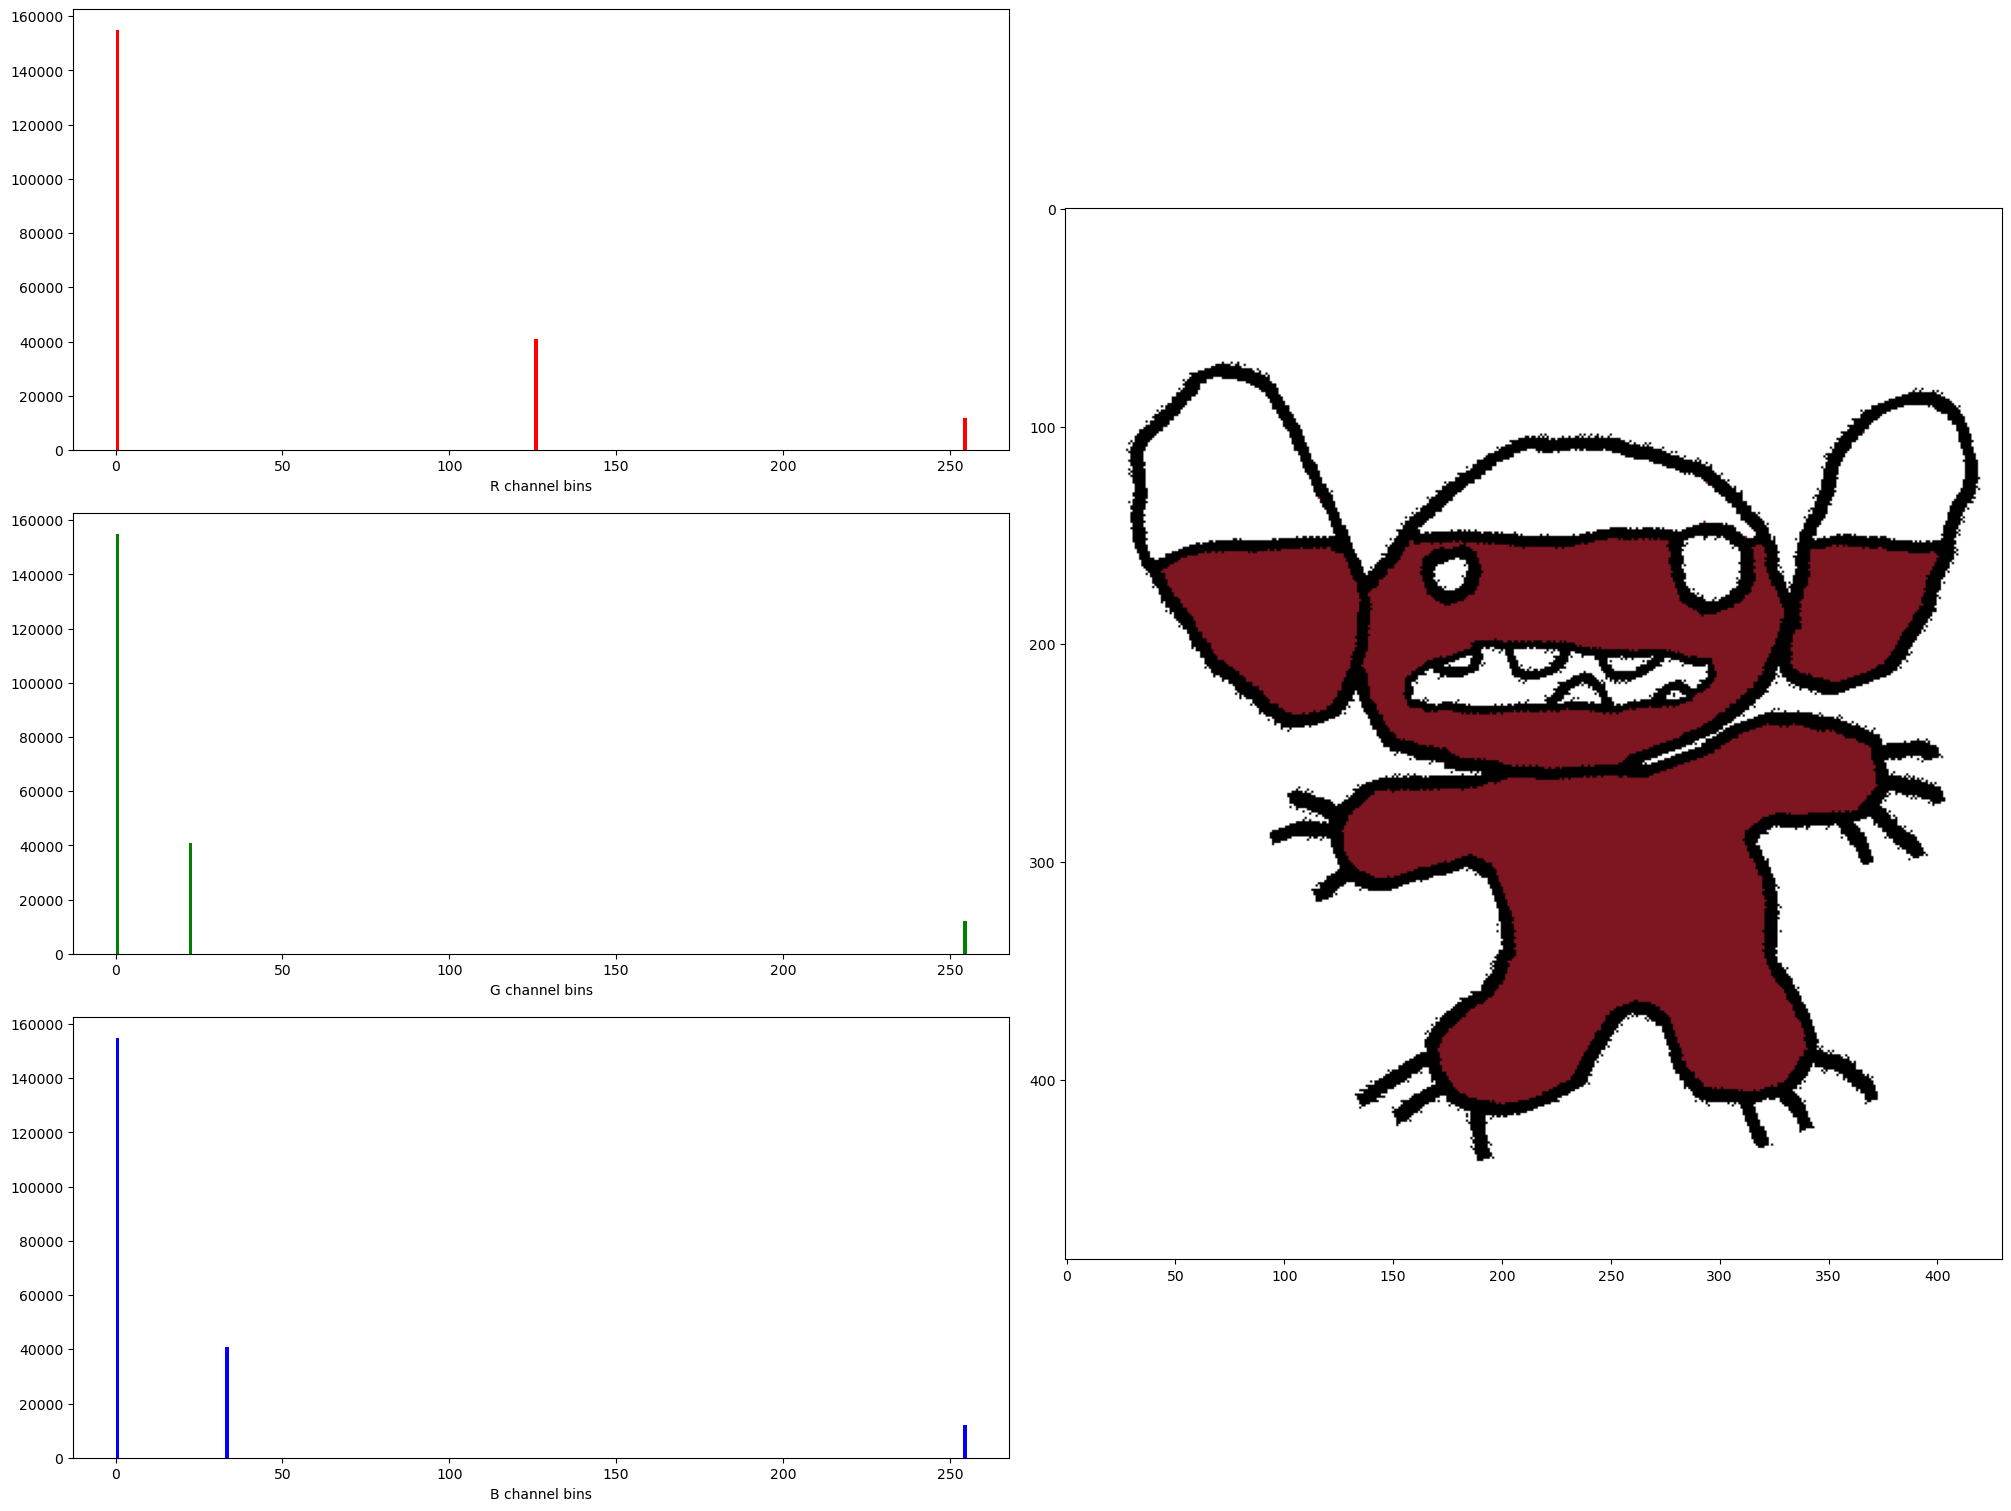

In [139]:
fig = plt.figure(constrained_layout=True, figsize=(20,15))
gs = fig.add_gridspec(3, 2) # three rows, two columns

# add red to the top(0) left (0)
ax1 = fig.add_subplot(gs[0,0]) # red
ax1.hist(im_data[:,:,0].flatten(),bins=256,color='red') # 0 = red
ax1.set_xlabel('R channel bins') 

# green will be middle (1), left (0)
ax2 = fig.add_subplot(gs[1,0]) # green
ax2.hist(im_data[:,:,1].flatten(),bins=256,color='green') # 1 = green
ax2.set_xlabel('G channel bins') 

# blue will be bottom (2), left(0)
ax3 = fig.add_subplot(gs[2,0]) # blue
ax3.hist(im_data[:,:,2].flatten(),bins=256,color='blue') # 2 = blue
ax3.set_xlabel('B channel bins') 

# the image will take up ALL (:) rows of the right (1) column
ax4 = fig.add_subplot(gs[:,1]) # image
ax4.imshow(im_data)

plt.show()

#### Corgi image

So, we see the above has a pretty simple RGB(A) distribution, what about a more complex image?

Let's first grab a more complex image with wget:

In [ ]:
#!wget https://github.com/UIUC-iSchool-DataViz/is445_data/raw/main/littleCorgiInHat.png

--2025-09-14 10:58:42--  https://github.com/UIUC-iSchool-DataViz/is445_data/raw/main/littleCorgiInHat.png
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/UIUC-iSchool-DataViz/is445_data/main/littleCorgiInHat.png [following]
--2025-09-14 10:58:42--  https://raw.githubusercontent.com/UIUC-iSchool-DataViz/is445_data/main/littleCorgiInHat.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 553572 (541K) [image/png]
Saving to: ‘littleCorgiInHat.png.2’

littleCorgiInHat.pn 100%[===================>] 540.60K  --.-KB/s    in 0.05s   

2025-09-14 10:58:42 (11.0 MB/s) - ‘littleCorgiInHat.png.2’ saved [553

Let's go through the process of reading in this image and changing it into data:

In [141]:
im2 = Image.open('littleCorgiInHat.png')

In [142]:
im2_data = np.array(im2)

Now let's plot!

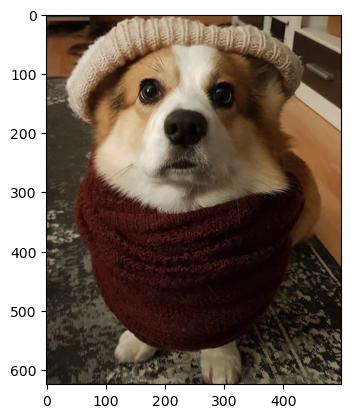

In [143]:
plt.imshow(im2_data)

Adorbs.

Now let's re-use our code for the new image to plot its color distribution:

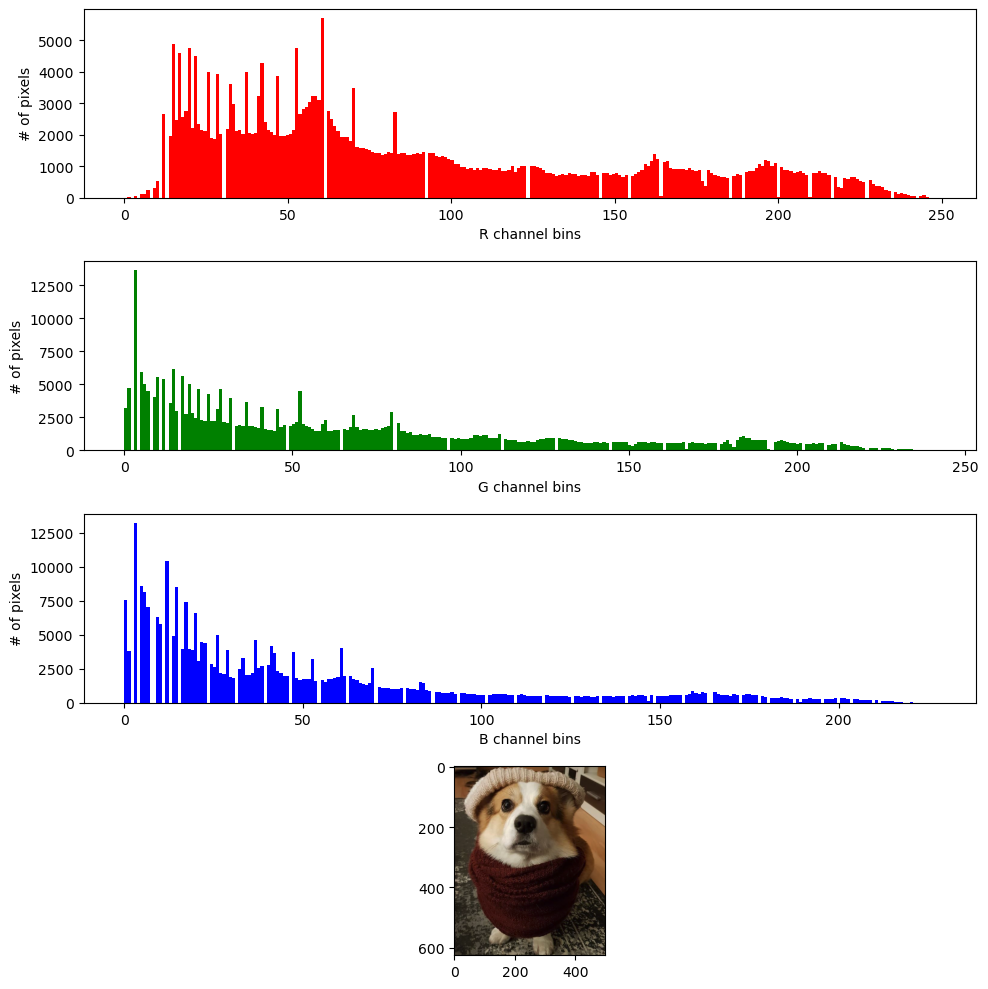

In [144]:
fig, ax = plt.subplots(4,1,figsize=(10,10))
ax[0].hist(im2_data[:,:,0].flatten(), color='red', bins=256)
ax[1].hist(im2_data[:,:,1].flatten(), color='green', bins=256)
ax[2].hist(im2_data[:,:,2].flatten(), color='blue', bins=256)

ax[0].set_xlabel('R channel bins')
ax[1].set_xlabel('G channel bins')
ax[2].set_xlabel('B channel bins')

ax[0].set_ylabel('# of pixels')
ax[1].set_ylabel('# of pixels')
ax[2].set_ylabel('# of pixels')

ax[3].imshow(im2_data)

fig.tight_layout()
plt.show()

What are some things you notice about the differences in the color distributions?

What parts of the histogram correspond to each part of the figure?

In [145]:
# #np.unique(im2_data[:,:,0])
# imgplot = im2_data.copy()
# #mask = im2_data[:,:,0]<50 # low red channel
# mask = (im2_data[:,:,1]<10) & (im2_data[:,:,1]>5) # low blue channel
# imgplot[~mask] = 0

# fig, ax = plt.subplots(figsize=(10,10)) # generate a "fig" and "ax" object

# ax.set_facecolor('blue')

# ax.imshow(imgplot) # then we plot our Stitch image over the top

In [146]:
im2_data.shape

(625, 499, 4)

# ASIDE: Python tips and tricks! We won't go through this in lecture but it's here if you want it!

* We've been playing around with a few complex things in Python, but lets take a step back for a moment and delve into how Python deals with data in a bit more detail

In [ ]:
# initialize a
a = []

In [ ]:
# take a gander at a
a
# hey look a is an empty list!

[]

In [ ]:
# we can mix types in our lists
a = [1, 2, "hey"]
# here we have a few integers and a string

In [ ]:
# lets look at a again
a

[1, 2, 'hey']

In [ ]:
# also, for our general purposes, we can call a string with a single or double quotes
'hey' == "hey"

True

In [ ]:
# we can also easily add to our list with the append statement
a.append("there")
a

[1, 2, 'hey', 'there']

In [ ]:
# returns an item at an index, & removes item, default is the last item
a.pop()

'there'

In [ ]:
# now a is back to what we had before
a

[1, 2, 'hey']

In [ ]:
# we can also grab elements of a by their indicies
a[1]

2

In [ ]:
# note that indexing starts from 0 in python
a[0]

1

In [ ]:
# the -# can be used to grab starting from the last element of the list
a[-1]

'hey'

In [ ]:
# the colon means "all the things"
a[:]

[1, 2, 'hey']

In [ ]:
# we can also take subsets easily, for example, ignorning the first element of a
# this is a way to filter data
a[1:]

[2, 'hey']

In [ ]:
# can also take all but the last eleement
a[:-1]

[1, 2]

In [ ]:
# we can also combine these two things to grab from the first to the 2nd to last element
# in this case, the one element
a[1:-1]

[2]

In [ ]:
# there are also some nice string manipulations we can do
#  like splitting a string into a list object
a = "this is a much longer list, where i have taken a sentence and split it based on the spaces".split()

In [ ]:
a

['this',
 'is',
 'a',
 'much',
 'longer',
 'list,',
 'where',
 'i',
 'have',
 'taken',
 'a',
 'sentence',
 'and',
 'split',
 'it',
 'based',
 'on',
 'the',
 'spaces']

In [ ]:
# we can grab every other element in the list
a[::2]

['this', 'a', 'longer', 'where', 'have', 'a', 'and', 'it', 'on', 'spaces']

In [ ]:
# we can also reorder this list back-to-front
a[::-1]

['spaces',
 'the',
 'on',
 'based',
 'it',
 'split',
 'and',
 'sentence',
 'a',
 'taken',
 'have',
 'i',
 'where',
 'list,',
 'longer',
 'much',
 'a',
 'is',
 'this']

In [ ]:
# we can also update individual strings in this list
a[3] = 'sorta'

In [ ]:
a

['this',
 'is',
 'a',
 'sorta',
 'longer',
 'list,',
 'where',
 'i',
 'have',
 'taken',
 'a',
 'sentence',
 'and',
 'split',
 'it',
 'based',
 'on',
 'the',
 'spaces']

In [ ]:
# now lets look quickly at some funny things about strings in Python
name = "jill"

In [ ]:
name[0]

'j'

In [ ]:
# this will produce an error
name[0] = 'J'

TypeError: 'str' object does not support item assignment

In [ ]:
# have to use something like replace
name.replace("j","J")

'Jill'

In [ ]:
# python also has stuff called dictionaries
d = {'bevier': 'building', 'green' : 'road', 'champaign': 'city'}

In [ ]:
d

{'bevier': 'building', 'green': 'road', 'champaign': 'city'}

In [ ]:
# here the "champaign" entry is of type "city"
d['champaign']

'city'

In [ ]:
# its super easy to add to dictionaries, here we add an empty list
d['mylist'] = []

In [ ]:
d

{'bevier': 'building', 'green': 'road', 'champaign': 'city', 'mylist': []}

In [ ]:
# we can add to this list in the usual way - with the above "append" function we used before
d['mylist'].append(10)

In [ ]:
d

{'bevier': 'building', 'green': 'road', 'champaign': 'city', 'mylist': [10]}

In [ ]:
# there are these other cool objects called "sets"
myset = set()

In [ ]:
myset

set()

In [ ]:
# lets check out some operations with sets, for example some movies I like
jill_movies = set(['last jedi', 'girls trip', 'frozen'])
# lets say we have another person named bob an these are the movies he likes
bob_movies = set(['last jedi', 'other movie'])

In [ ]:
jill_movies

{'frozen', 'girls trip', 'last jedi'}

In [ ]:
bob_movies

{'last jedi', 'other movie'}

In [ ]:
# we can create a set that is made up of my movies, but without those movies that appear in bob's movies list
jill_movies - bob_movies

{'frozen', 'girls trip'}

In [ ]:
jill_movies[0] # note we can't index

TypeError: 'set' object is not subscriptable

In [ ]:
# we can take the union of sets
jill_movies.union(bob_movies)

{'frozen', 'girls trip', 'last jedi', 'other movie'}

In [ ]:
# for some final string manipulation, we can use a thing called enumerate 
# to both count in a for loop and use an element of our list directly
for i, word in enumerate(reversed(a)):
    print(i, word.upper())

0 SPACES
1 THE
2 ON
3 BASED
4 IT
5 SPLIT
6 AND
7 SENTENCE
8 A
9 TAKEN
10 HAVE
11 I
12 WHERE
13 LIST,
14 LONGER
15 SORTA
16 A
17 IS
18 THIS


In [ ]:
# continue and break are flow control statements
for i, word in enumerate(sorted(a)):
    if word == "and":
        continue
    if word == "it":
        break
    print(i, word.upper())

0 A
1 A
3 BASED
4 HAVE
5 I
6 IS


In [ ]:
# also, we can use the "?" to figure out things we don't know, for example the reader
#  function from  the csv library
import csv

In [ ]:
csv.reader?